In [14]:
! pip install kmodes
! pip install gower
! pip install bevel

ERROR: Could not find a version that satisfies the requirement bevel (from versions: none)
ERROR: No matching distribution found for bevel


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import TSNE

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from kmodes.kprototypes import KPrototypes

from gower import gower_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import adjusted_rand_score, silhouette_samples, silhouette_score

import seaborn as sns

from sklearn.cluster import KMeans

### Importing the data

In [2]:
df=pd.read_csv('cs173sp23masterdata.csv')
print(list(df.columns))
df = df[(df['Isfw'] == 1) & (df['IsPoe1'] == 1)&(df['IsPoe2'] == 1)&(df['Ismidterm'] == 1)&(df['IsFinal'] == 1)]
print(df.shape)

mapping1 = {'Very useful': 4, 'Somewhat useful': 3, 'Did not use': 2, 'Not useful': 1}
df = df.replace(mapping1)
mapping2={'> 3 hours': 4, '> 1 hour but < 3 hours': 3, '< 1 hour': 2, 'Did not use': 1} 
#['< 1 hour', 'Did not use', '> 1 hour but < 3 hours', '> 3 hours']
df=df.replace(mapping2)


['Isfw', 'IsPoe1', 'IsPoe2', 'Ismidterm', 'IsFinal', 'IsMerit', 'netID', 'fwQ52', 'fwQ1_1', 'fwQ1_2', 'fwQ1_3', 'fwQ1_4', 'fwQ1_5', 'fwQ1_6', 'fwQ1_7', 'fwQ1_8', 'fwQ1_9', 'fwQ1_10', 'fwQ1_11', 'fwQ1_12', 'fwQ1_13', 'fwQ1_14', 'fwQ1_15', 'fwQ1_16', 'fwQ2_1', 'fwQ2_2', 'fwQ2_3', 'fwQ2_4', 'fwQ2_5', 'fwQ2_6', 'fwQ3', 'fwQ4', 'fwQ5', 'fwQ6', 'fwQ7', 'fwQ8', 'fwQ9', 'fwQ10', 'fwQ11', 'fwQ12', 'fwQ13', 'fwQ14', 'fwQ15', 'fwQ16', 'fwQ17', 'fwQ18', 'fwQ19', 'fwQ20', 'fwQ21', 'fwQ22', 'fwQ23', 'fwQ24', 'fwQ25', 'fwQ26', 'fwQ27', 'fwQ28', 'fwQ29', 'fwQ30', 'fwQ31', 'fwQ32', 'fwQ33', 'fwQ34', 'fwQ35', 'fwQ36', 'fwQ37', 'fwQ38', 'fwQ39', 'fwQ40', 'fwQ41', 'fwQ42', 'fwQ43', 'fwQ44', 'fwQ45', 'fwQ46', 'fwEndDate', 'fwQ48', 'fwisUIN', 'fwfw_consent', 'fwrn', 'fwdate_diff', 'fwisduplicate', 'fwIsName', 'poe1Logged in User ID', 'poe1Submitted On', 'poe1First Name', 'poe1Last Name', 'poe1Is Illinois Staff', 'poe1Staff Illinois Department Name', 'poe1Is Illinois Student', 'poe1Student Illinois College/U

In [3]:
mapdf=pd.read_excel('DataDescription.xlsx')
print(list(mapdf.columns))



['ColumnName', 'ColumnDescription', 'IsQn']


In [4]:
qn_list=list(mapdf[mapdf['IsQn']==1]['ColumnName'])
qns=df[qn_list]

## Factor Analysis

In [5]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(qns)
chi_square_value, p_value ## Should employ factor analysis 

(25095.800492104892, 0.0)

In [6]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(qns)
kmo_model ## Facotr analysis should be useful 

C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\factor_analyzer\utils.py:245: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  "The inverse of the variance-covariance matrix "


0.7415350401968729

In [8]:
# Create factor analysis object and perform factor analysis
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.set_params(n_factors=25, rotation=None)
fa.fit(qns)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([6.5458553 , 5.51255511, 4.75361123, 3.49055411, 3.47168268,
       3.27597543, 3.10237652, 2.54887179, 2.2252868 , 2.1155141 ,
       2.00262172, 1.8761542 , 1.84416063, 1.74675903, 1.66356705,
       1.5503084 , 1.4477711 , 1.40581234, 1.39313451, 1.33569177,
       1.26992572, 1.24882888, 1.21385516, 1.18626163, 1.17828295,
       1.12332695, 1.10378649, 1.09407531, 1.07328099, 1.05197184,
       1.02354326, 1.01082202, 0.98073071, 0.96664014, 0.94157533,
       0.92003005, 0.91520245, 0.88954162, 0.86056072, 0.84673167,
       0.83923539, 0.82080689, 0.80675213, 0.79653605, 0.78072078,
       0.7560646 , 0.74708676, 0.7443866 , 0.7173186 , 0.70521735,
       0.69229258, 0.67801178, 0.6651432 , 0.63654062, 0.63325334,
       0.61353104, 0.6012572 , 0.59139399, 0.5786521 , 0.57309121,
       0.55707667, 0.54410017, 0.53107967, 0.52767623, 0.52558334,
       0.51021155, 0.49184392, 0.47788561, 0.46435159, 0.45810342,
       0.44543408, 0.44070278, 0.42913395, 0.40674814, 0.39249

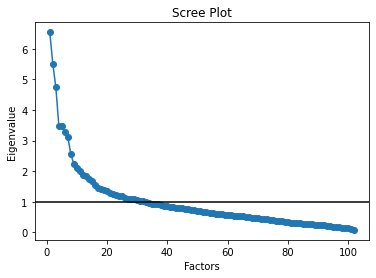

In [69]:
# Create scree plot using matplotlib
import matplotlib.pyplot as plt
plt.scatter(range(1,qns.shape[1]+1),ev)
plt.plot(range(1,qns.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1,c='k')

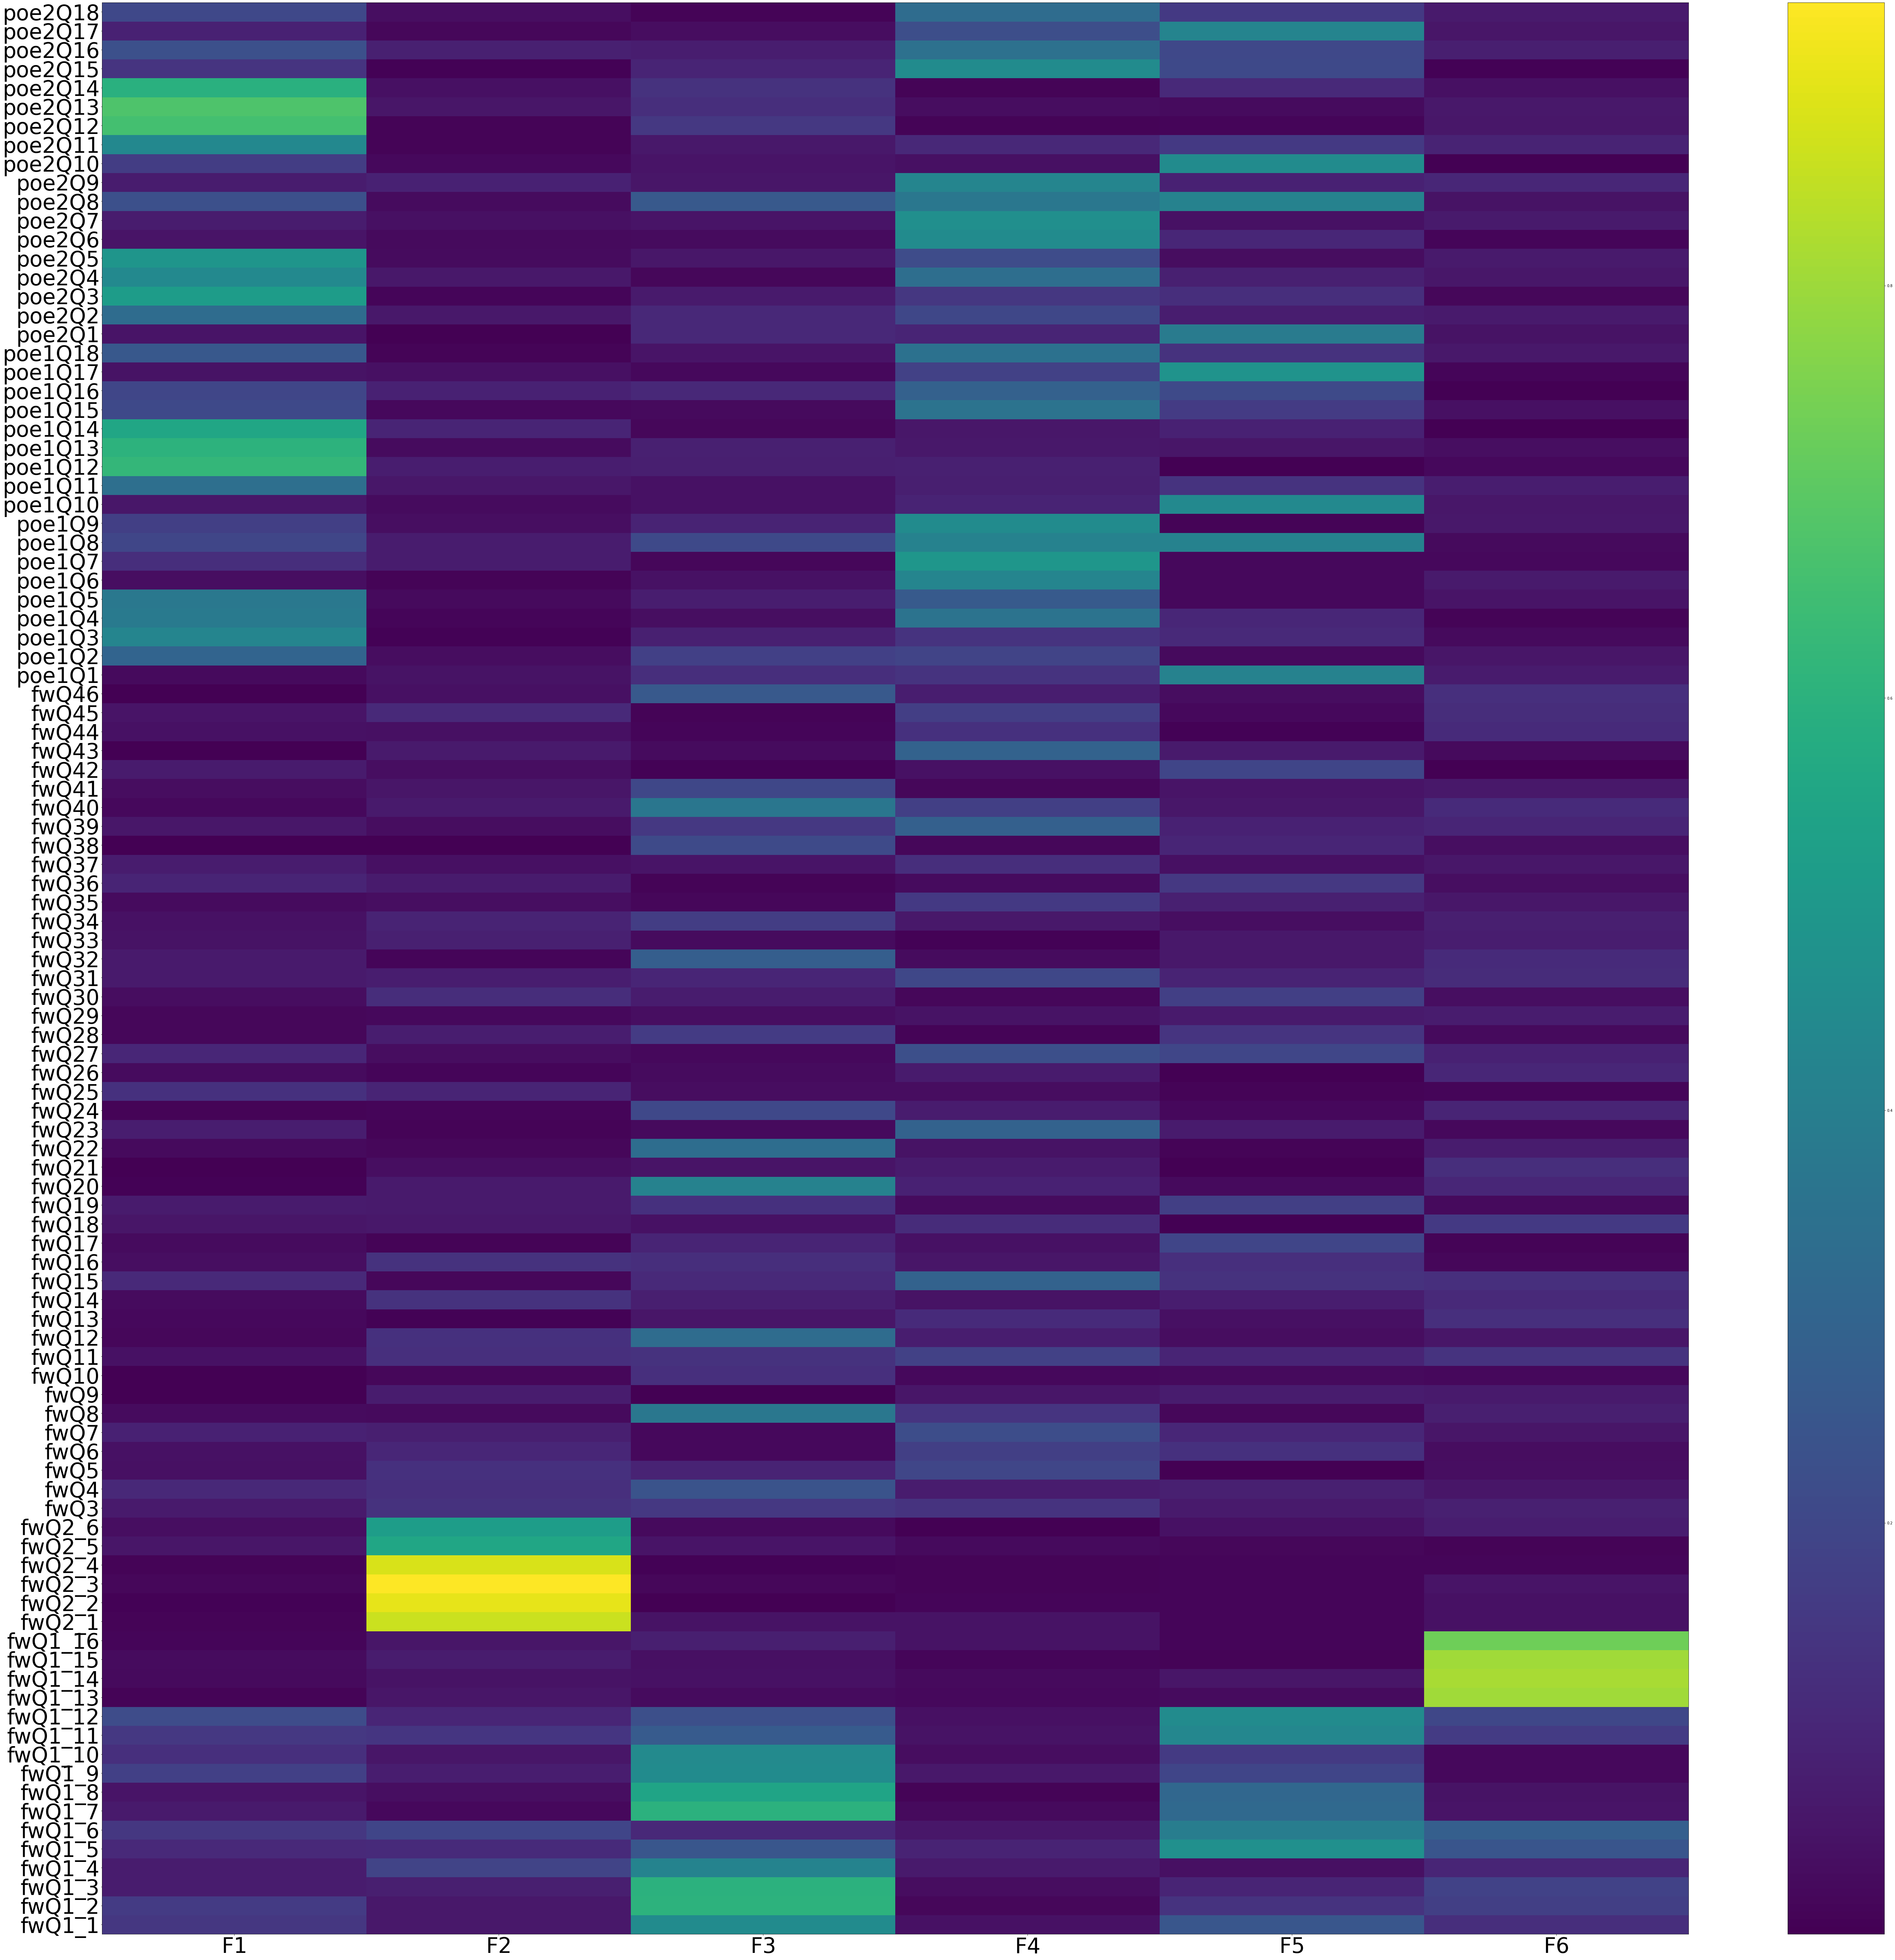

In [13]:
# Create factor analysis object and perform factor analysis
num_factor = 6
fa = FactorAnalyzer()
fa.set_params(n_factors=num_factor, rotation="quartimax")
fa.fit(qns)
loadings=fa.loadings_

plt.rcParams['figure.figsize'] = (100.0, 100.0)
Z=np.abs(loadings)
arr = [f'F{i}' for i in range(1, num_factor+1)]
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(loadings.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(loadings.shape[1])+0.5, minor=False)
ax.set_yticklabels(qns.columns)
ax.set_xticklabels(arr)
ax.tick_params(axis='both', which='major', labelsize=60)
plt.show()

#### Data Visualisation

In [24]:
mapdf[mapdf['ColumnName']==col]['ColumnDescription'].iloc[0]

'classBoring'

fwQ1_1


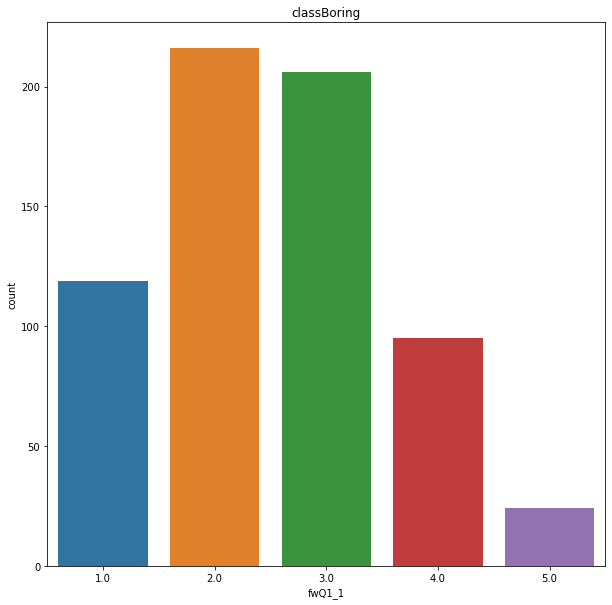

fwQ1_2


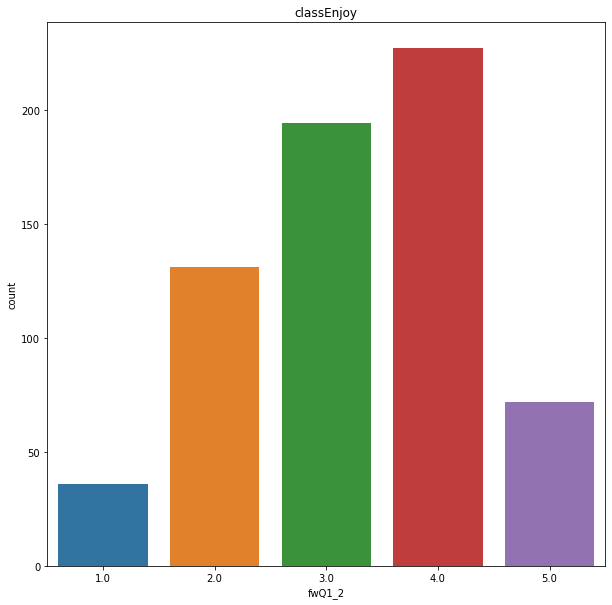

fwQ1_3


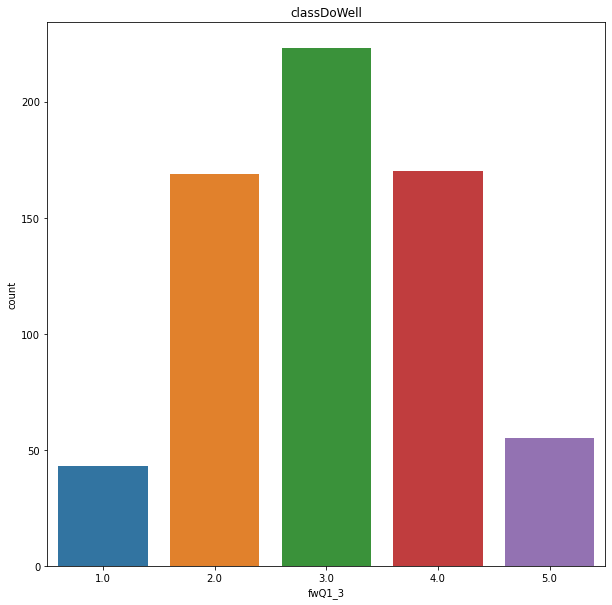

fwQ1_4


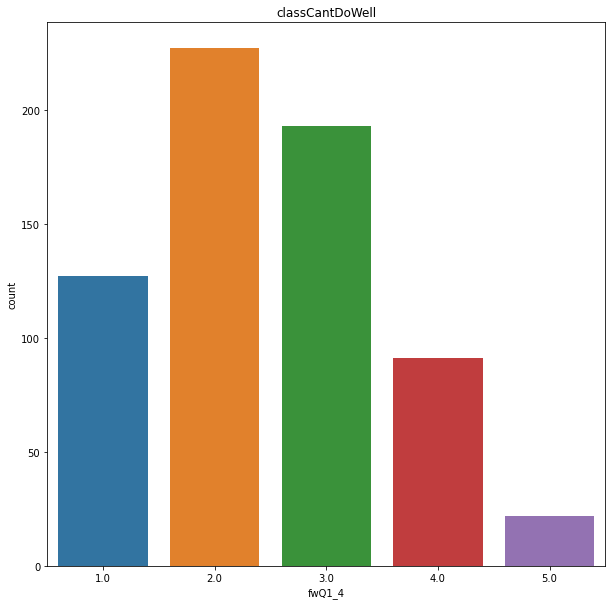

fwQ1_5


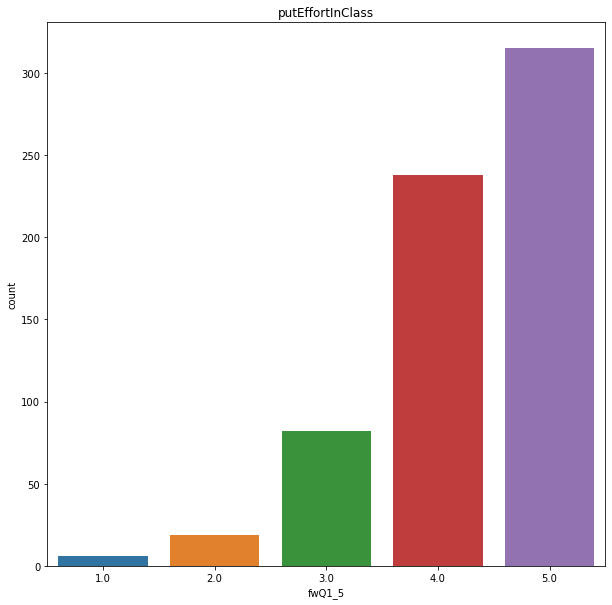

fwQ1_6


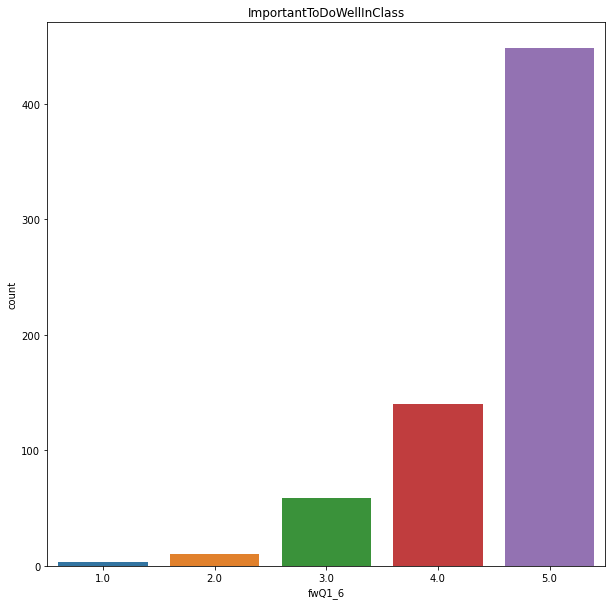

fwQ1_7


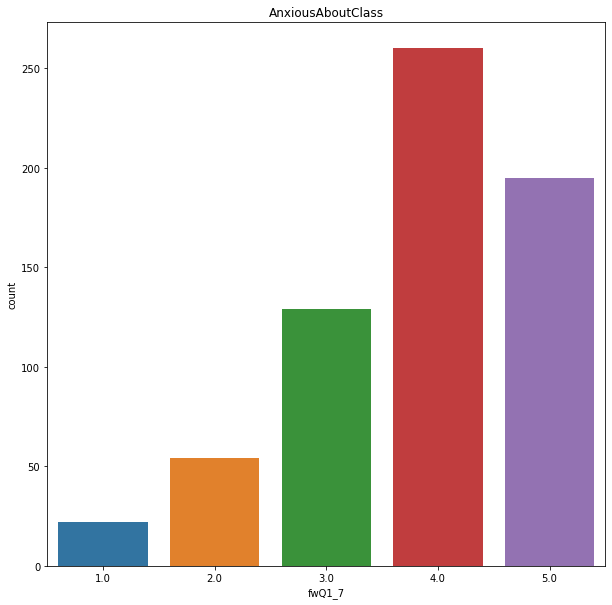

fwQ1_8


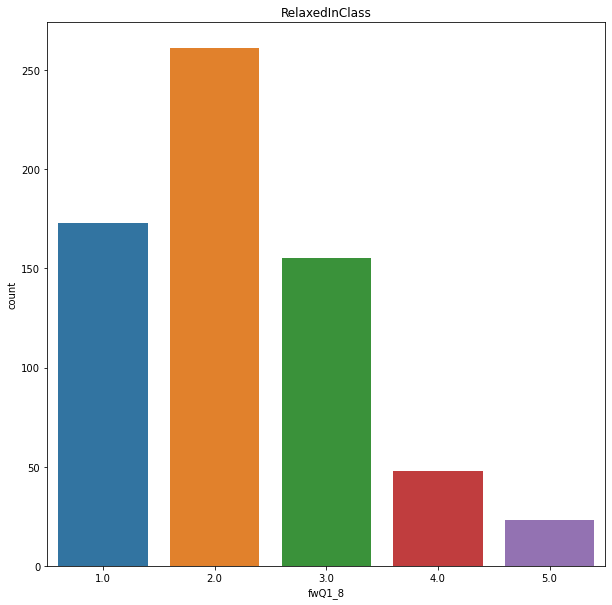

fwQ1_9


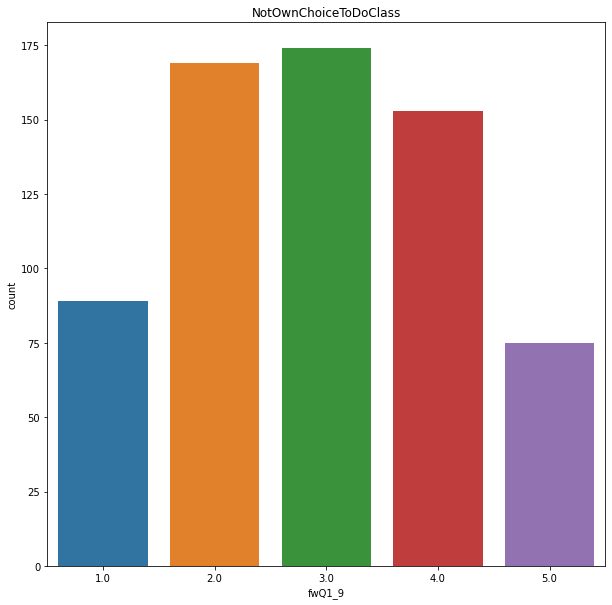

fwQ1_10


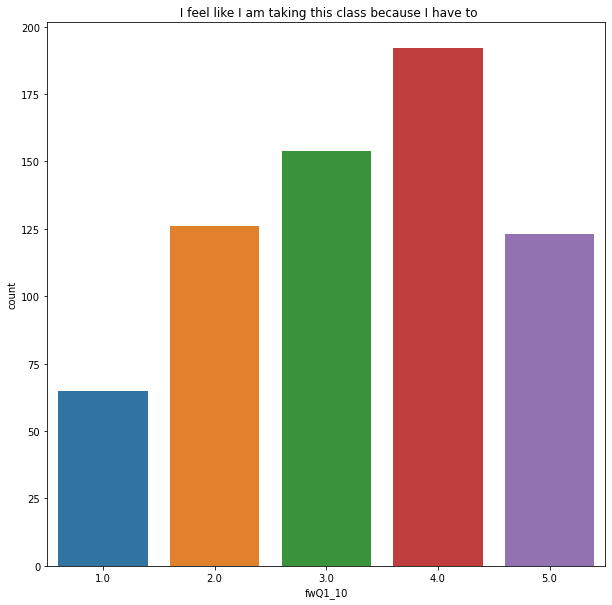

fwQ1_11


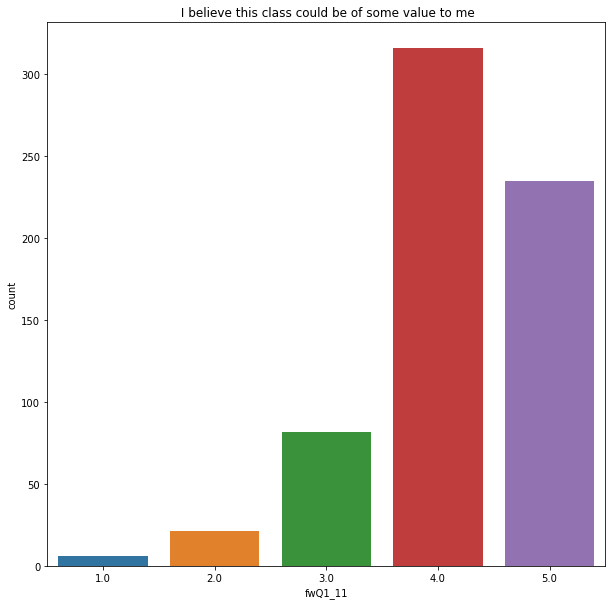

fwQ1_12


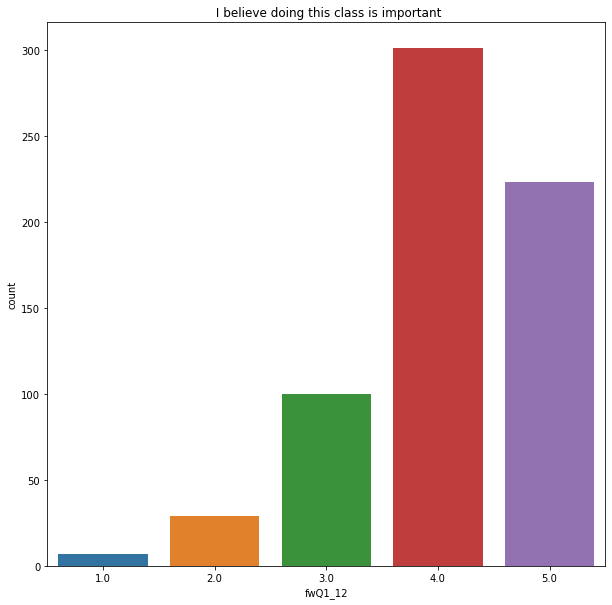

fwQ1_13


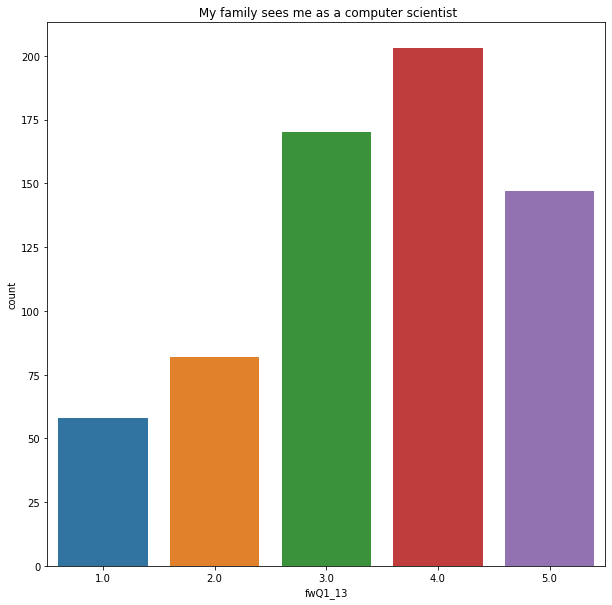

fwQ1_14


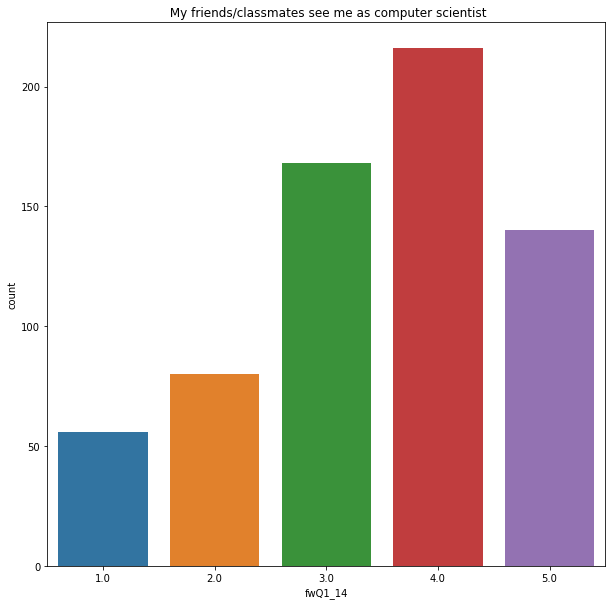

fwQ1_15


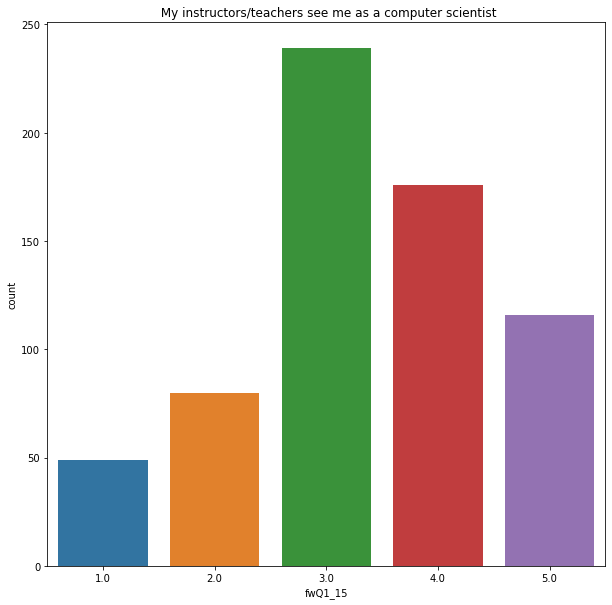

fwQ1_16


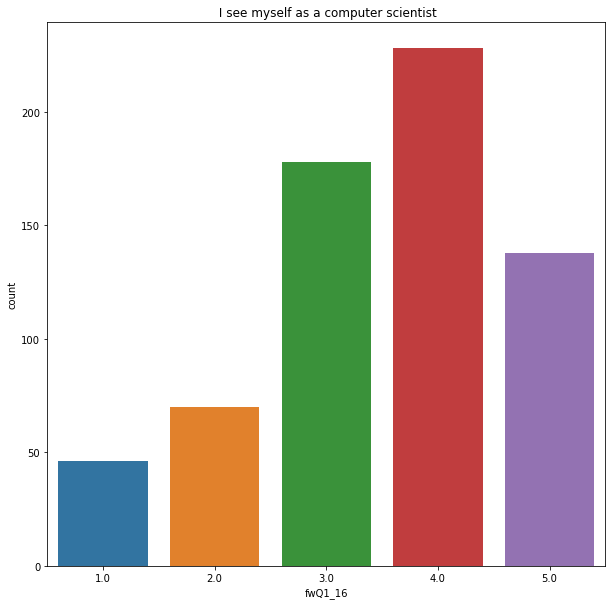

fwQ2_1


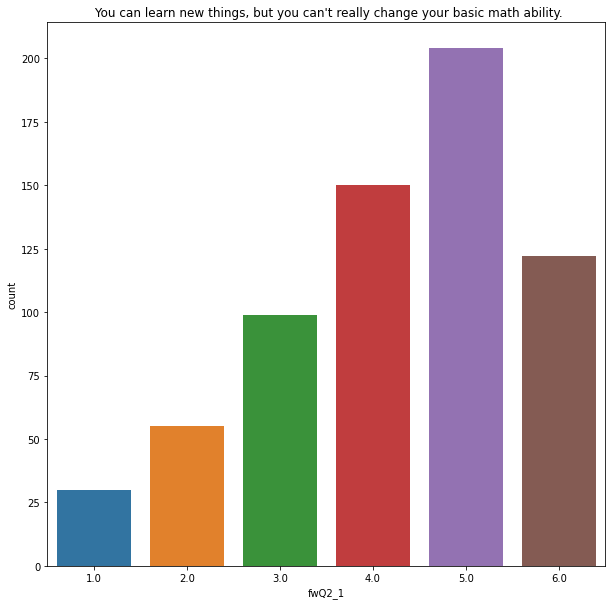

fwQ2_2


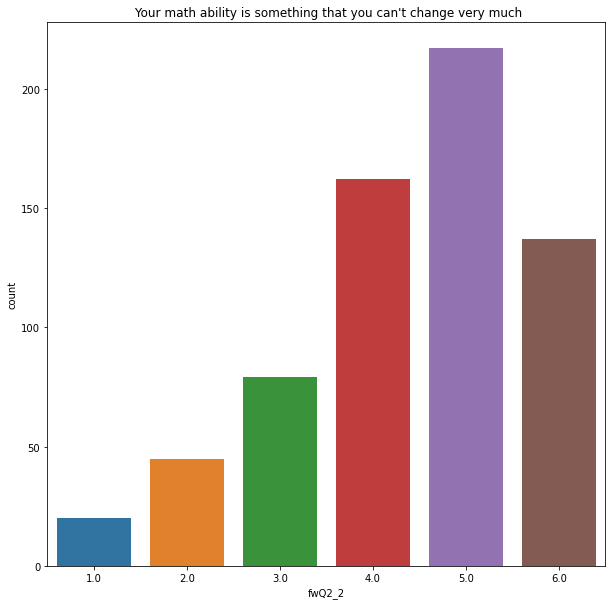

fwQ2_3


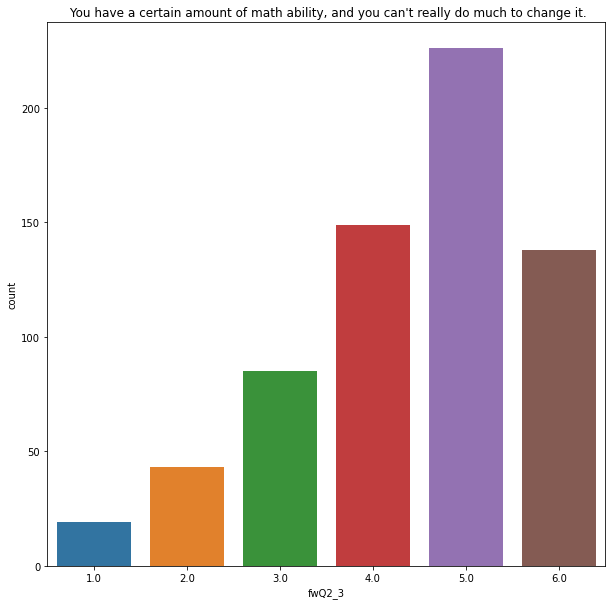

fwQ2_4


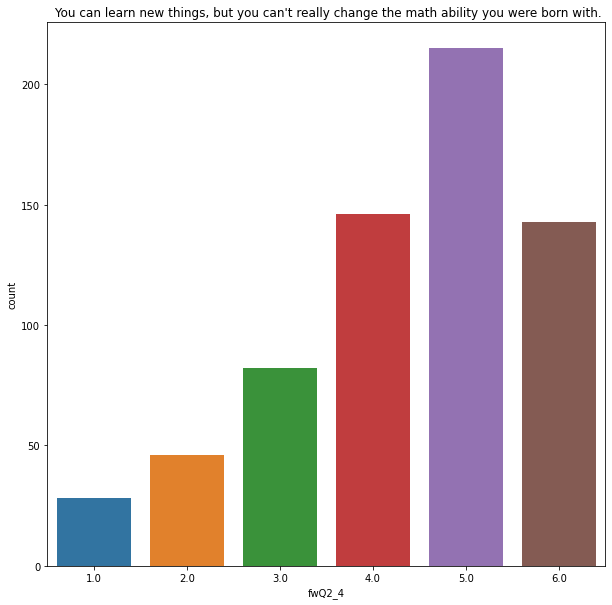

fwQ2_5


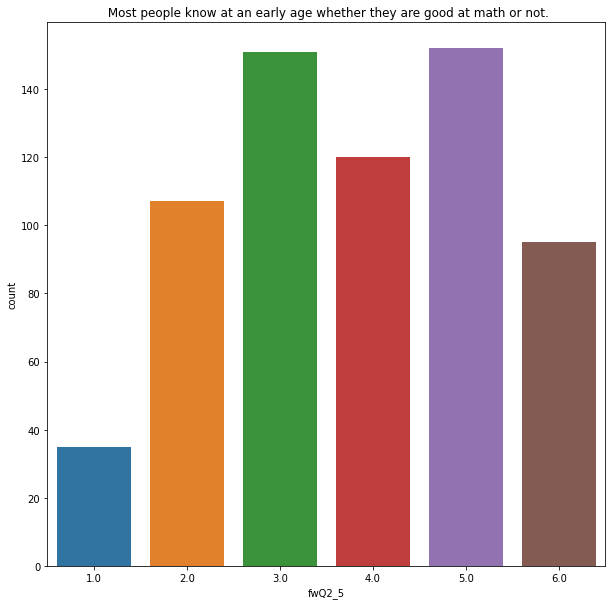

fwQ2_6


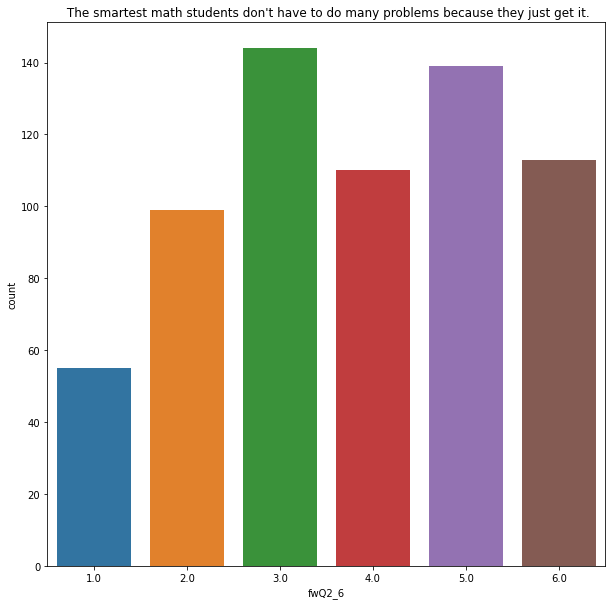

fwQ3


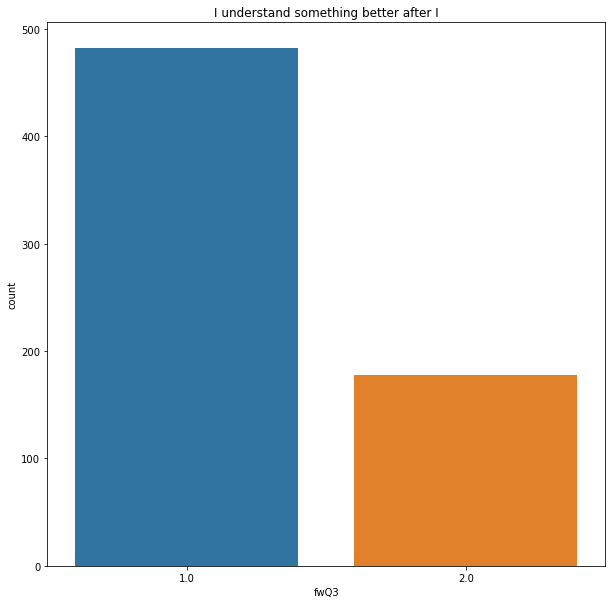

fwQ4


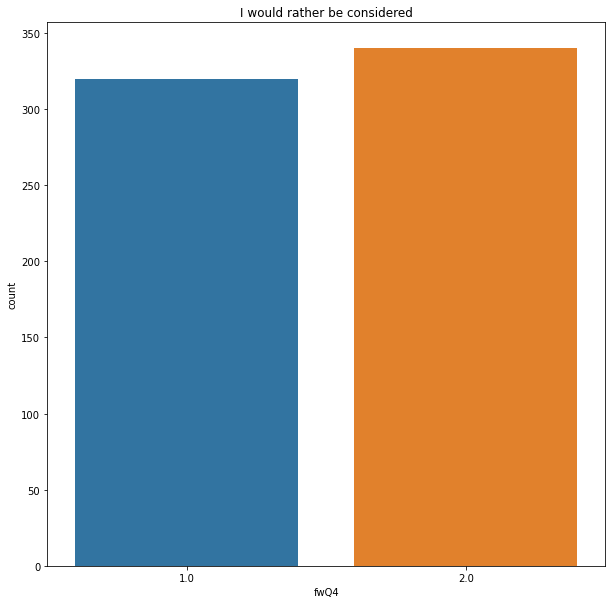

fwQ5


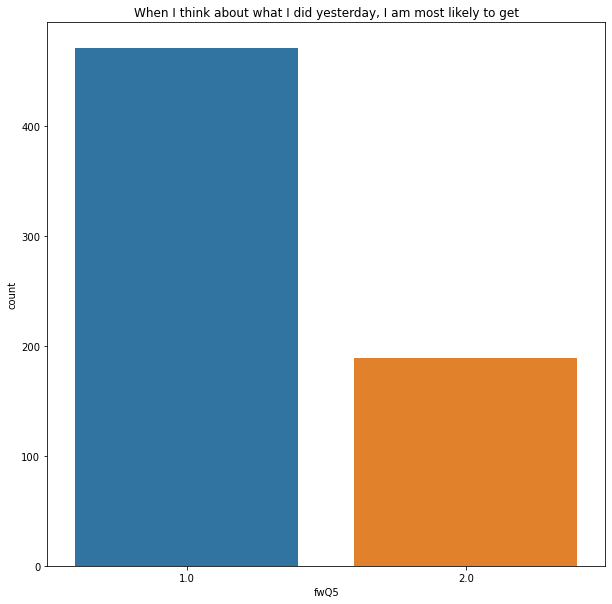

fwQ6


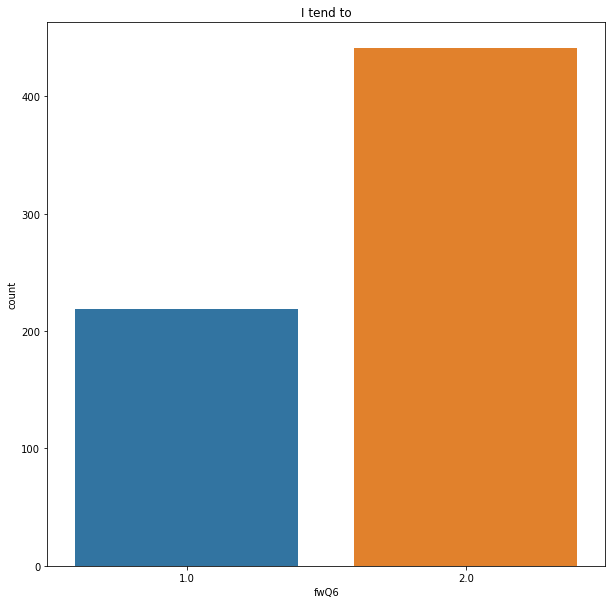

fwQ7


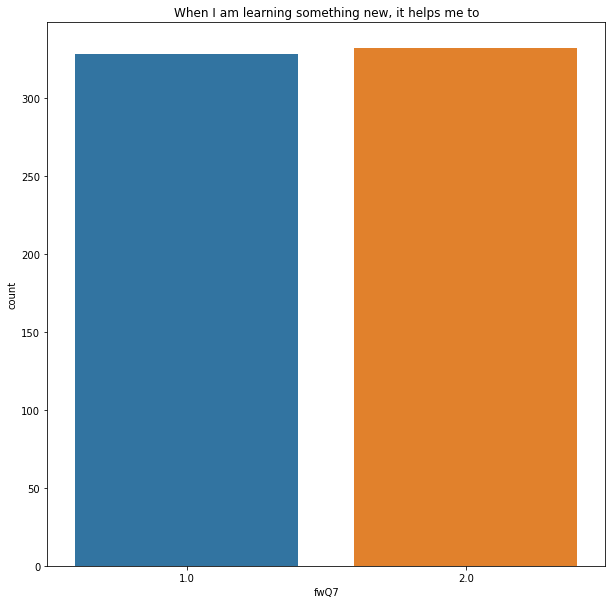

fwQ8


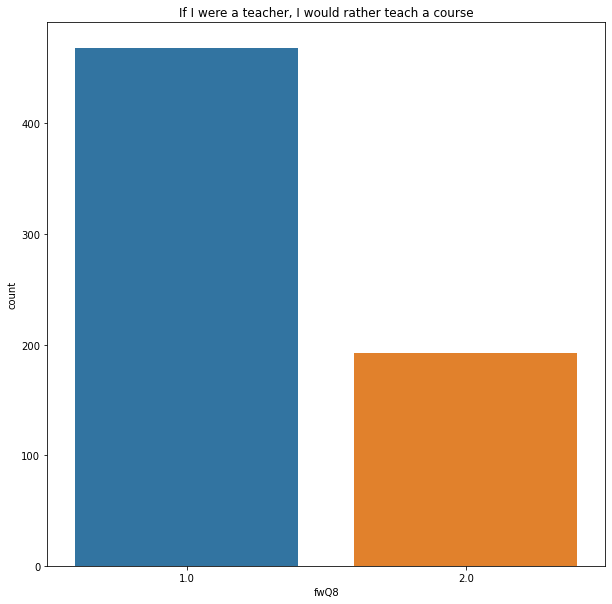

fwQ9


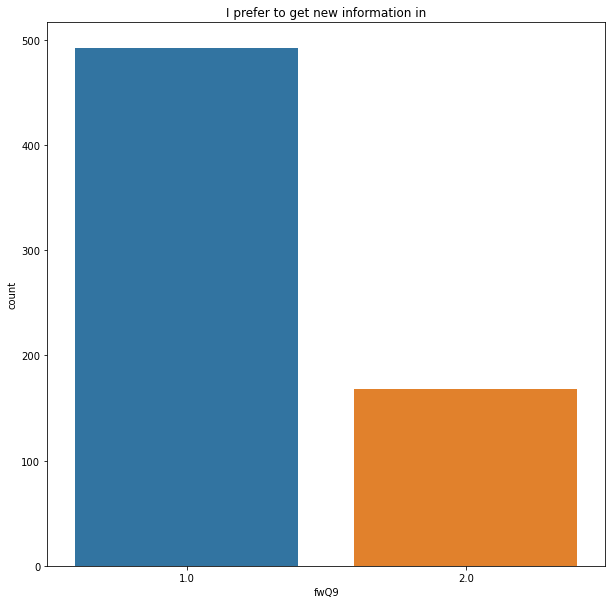

fwQ10


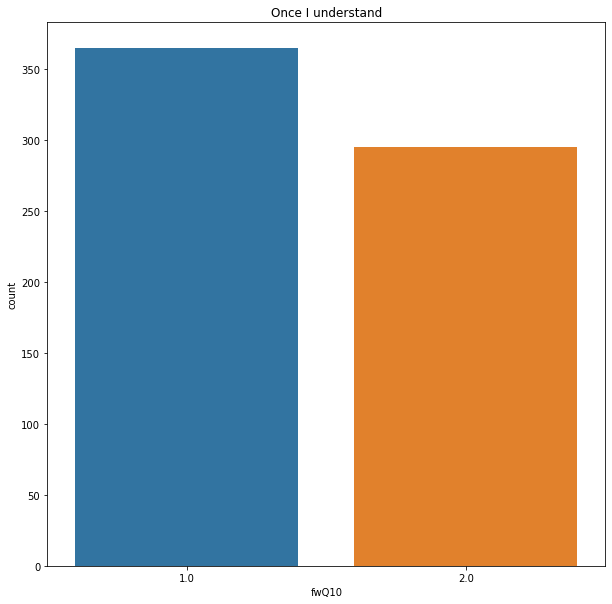

fwQ11


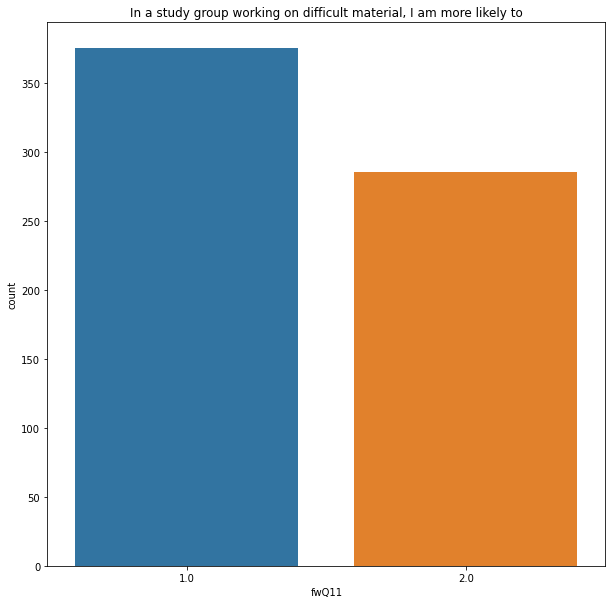

fwQ12


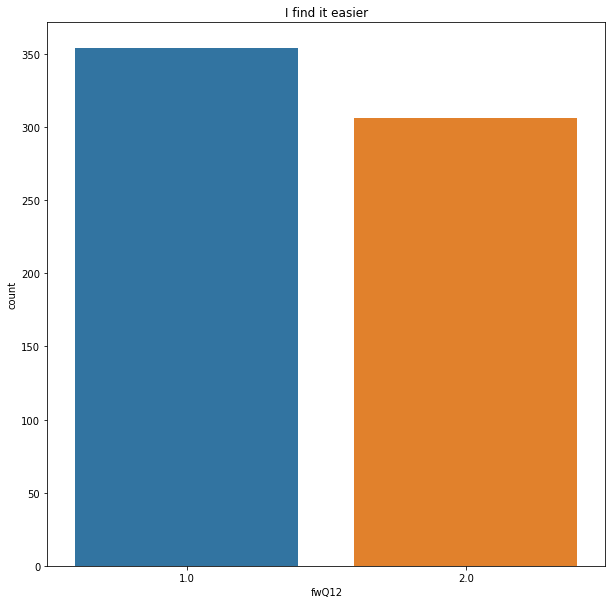

fwQ13


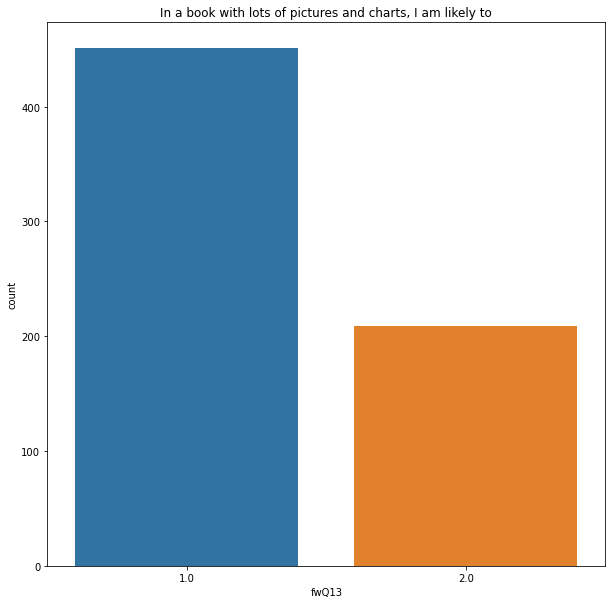

fwQ14


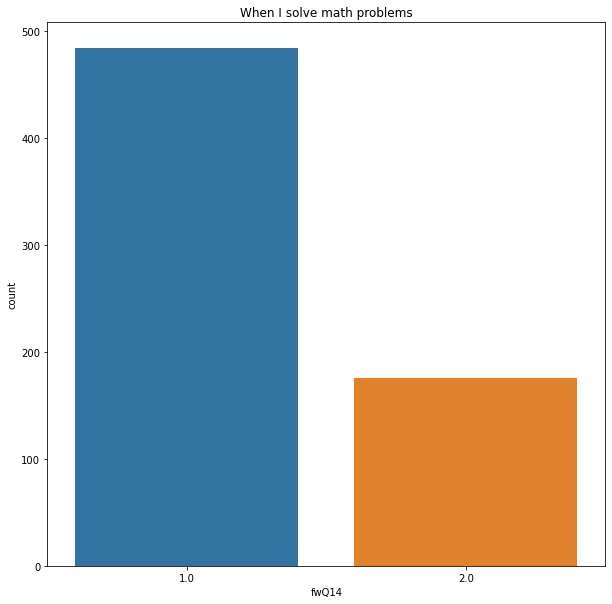

fwQ15


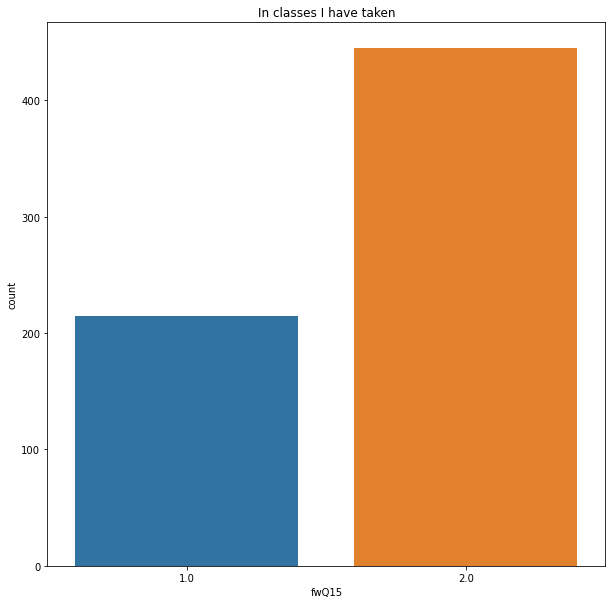

fwQ16


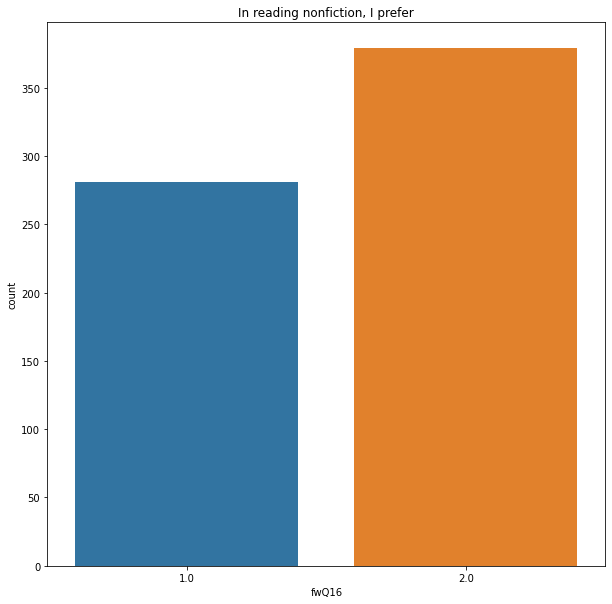

fwQ17


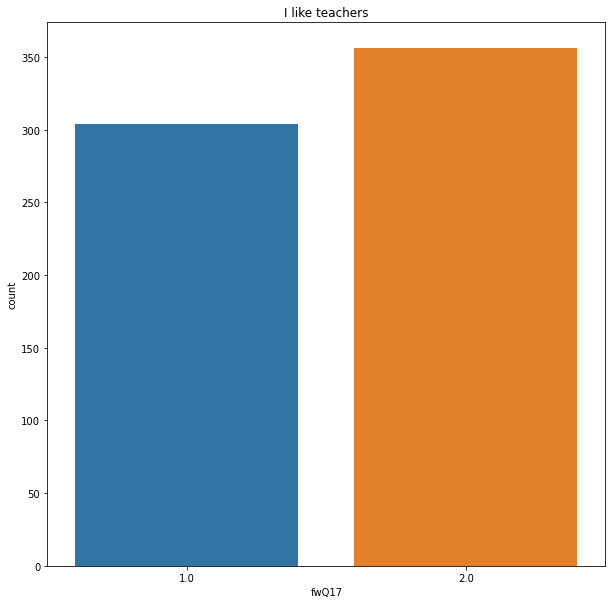

fwQ18


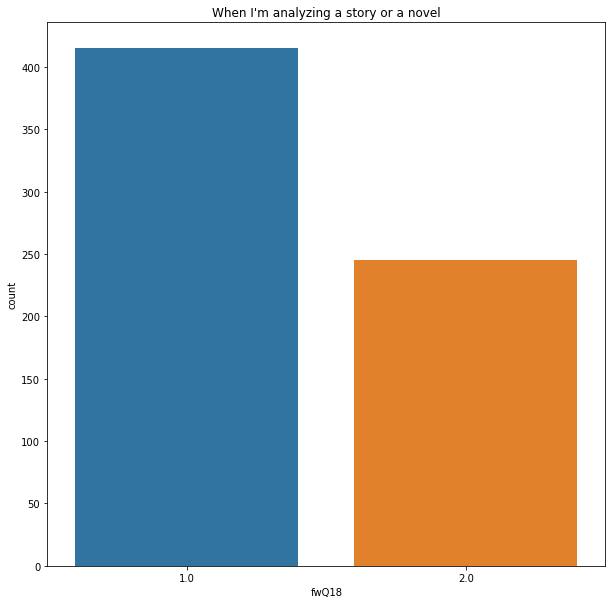

fwQ19


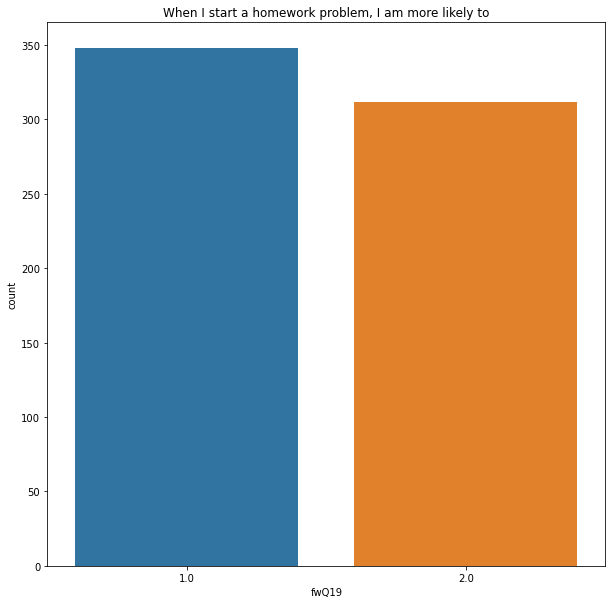

fwQ20


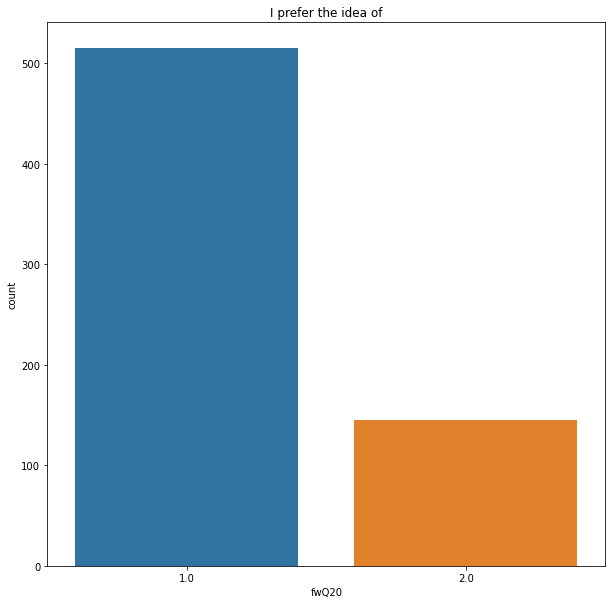

fwQ21


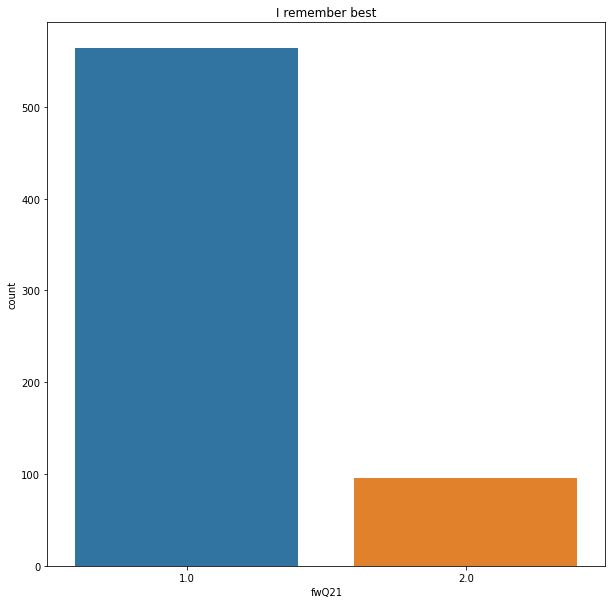

fwQ22


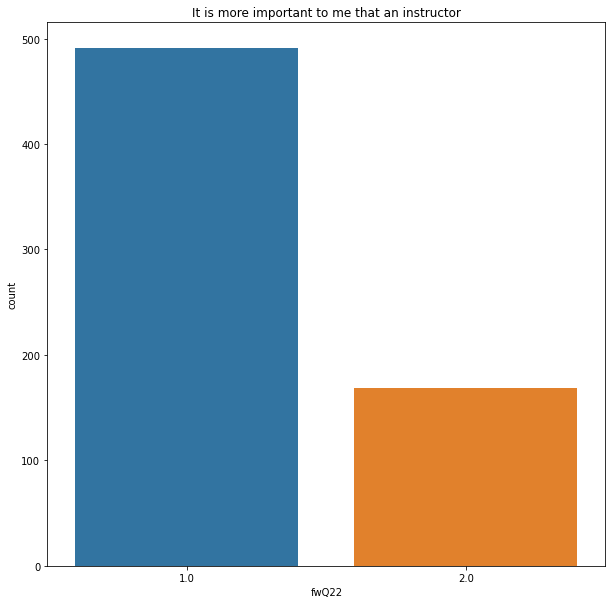

fwQ23


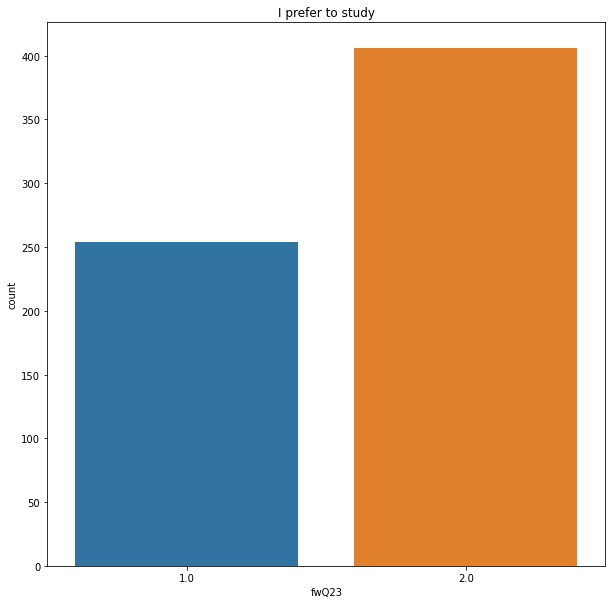

fwQ24


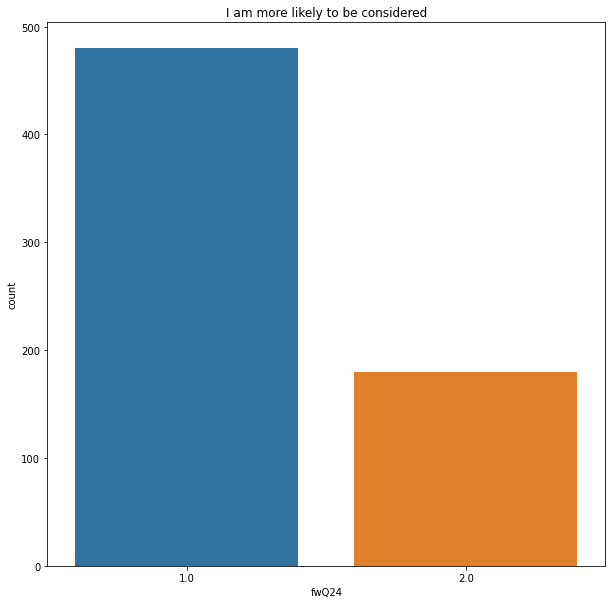

fwQ25


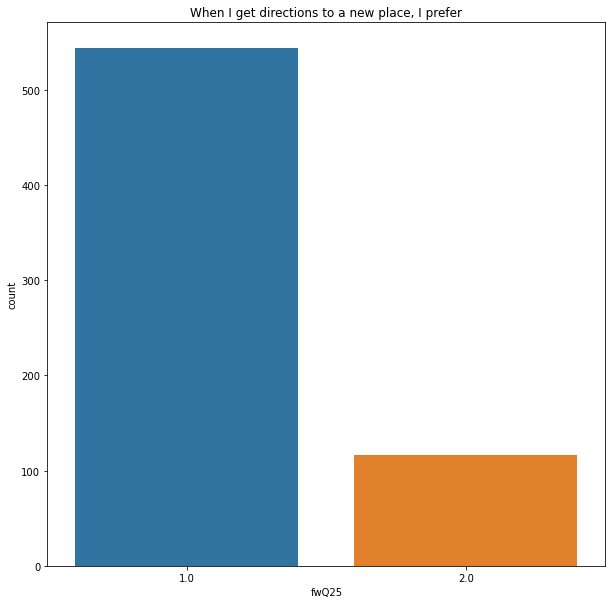

fwQ26


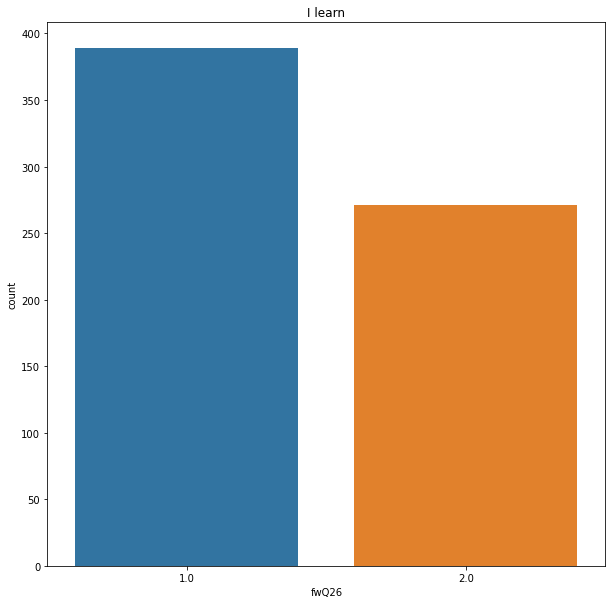

fwQ27


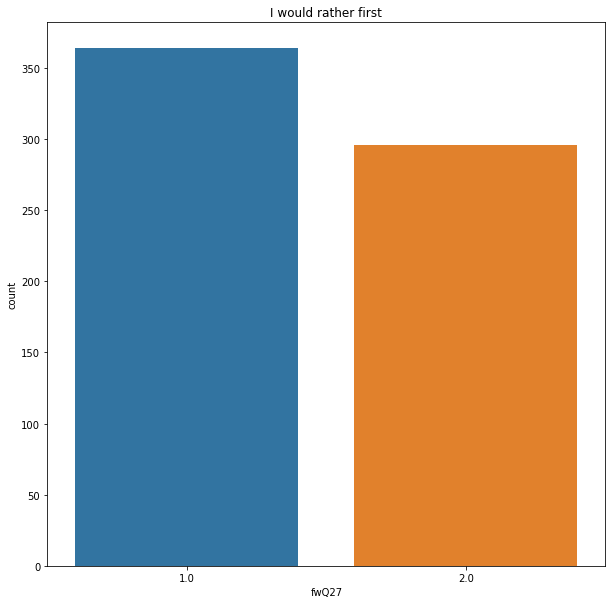

fwQ28


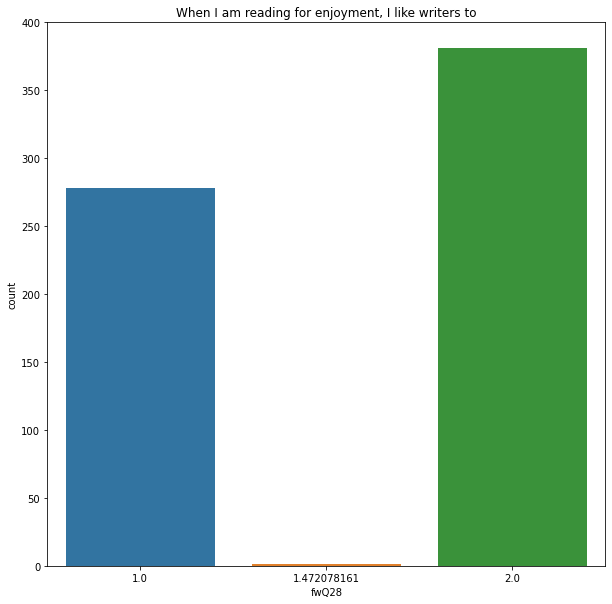

fwQ29


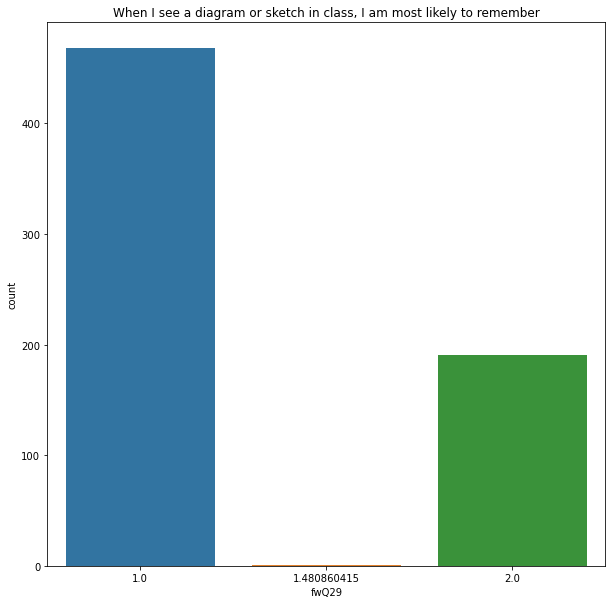

fwQ30


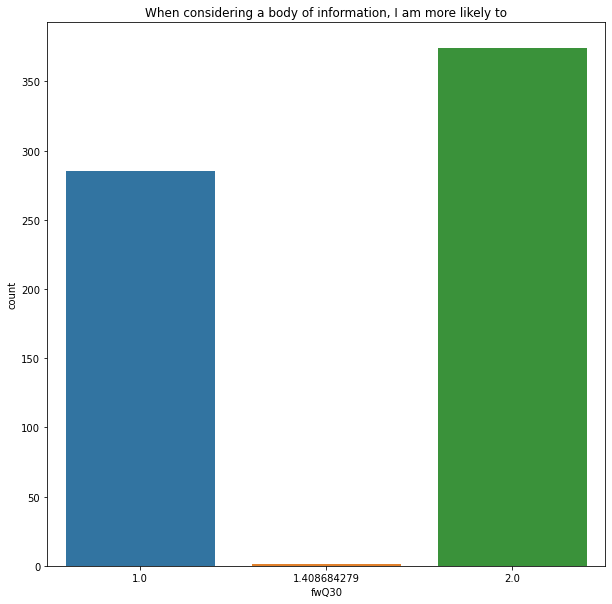

fwQ31


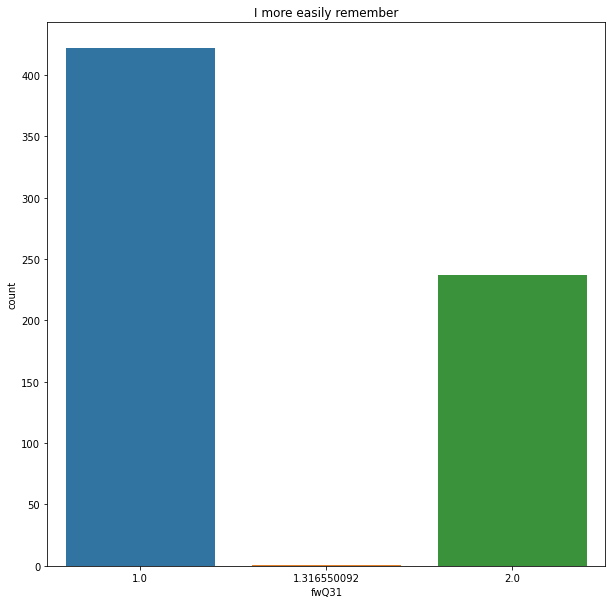

fwQ32


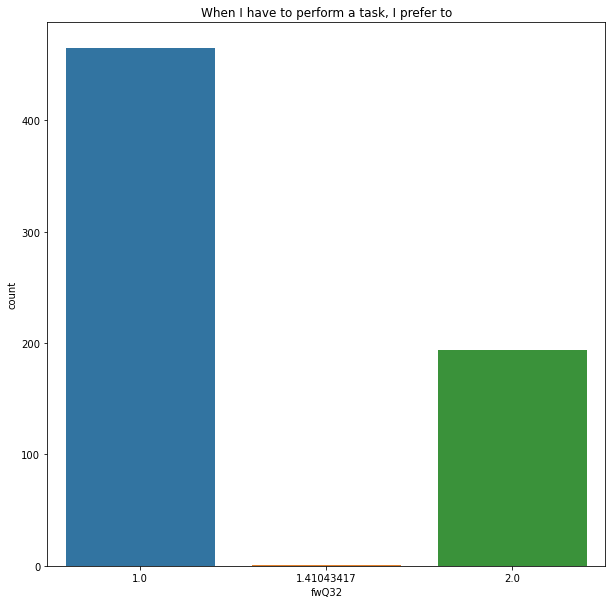

fwQ33


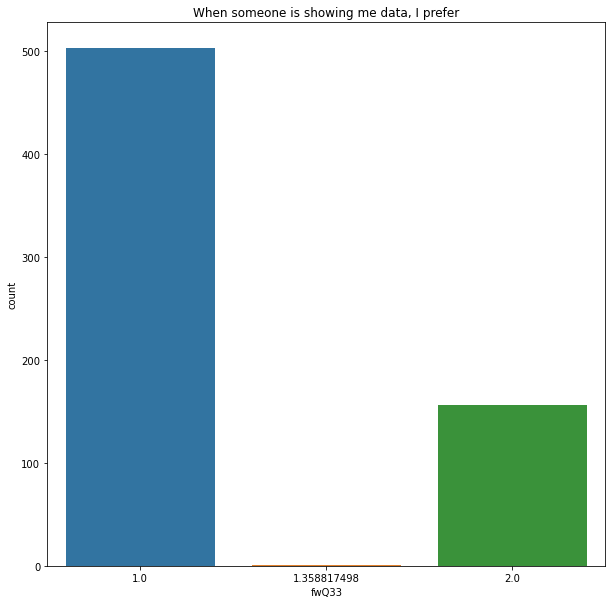

fwQ34


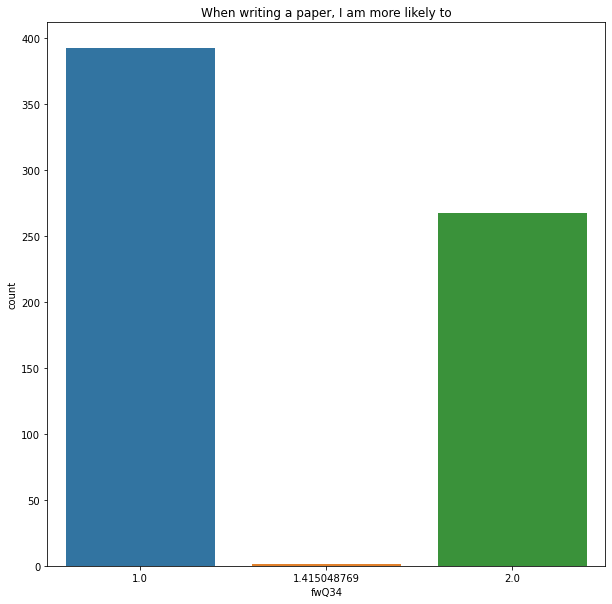

fwQ35


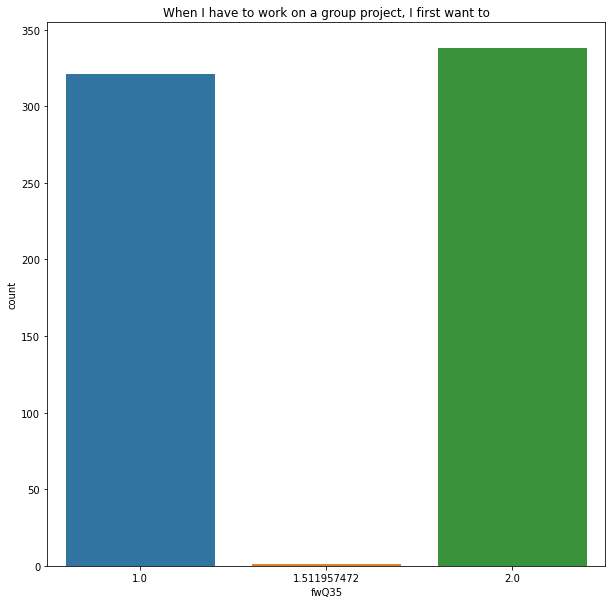

fwQ36


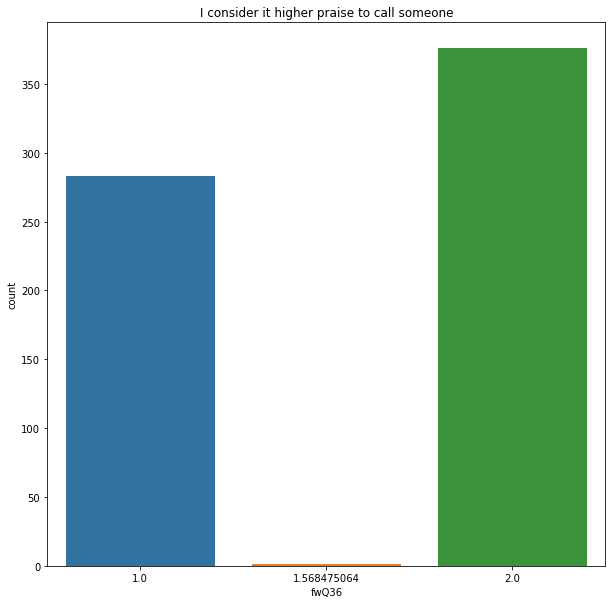

fwQ37


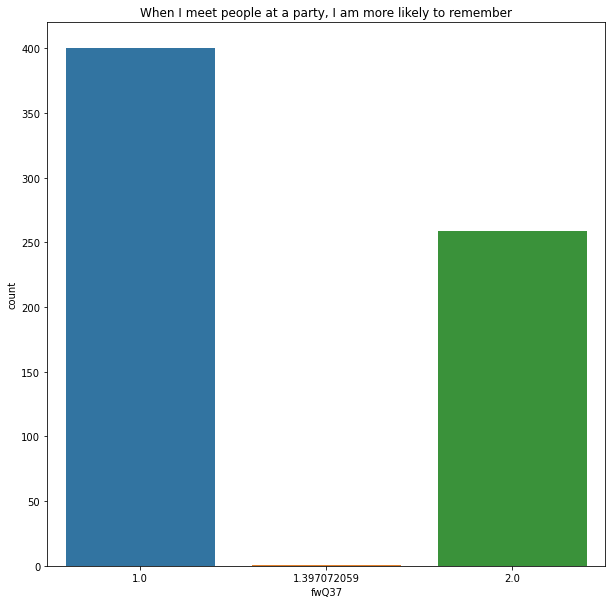

fwQ38


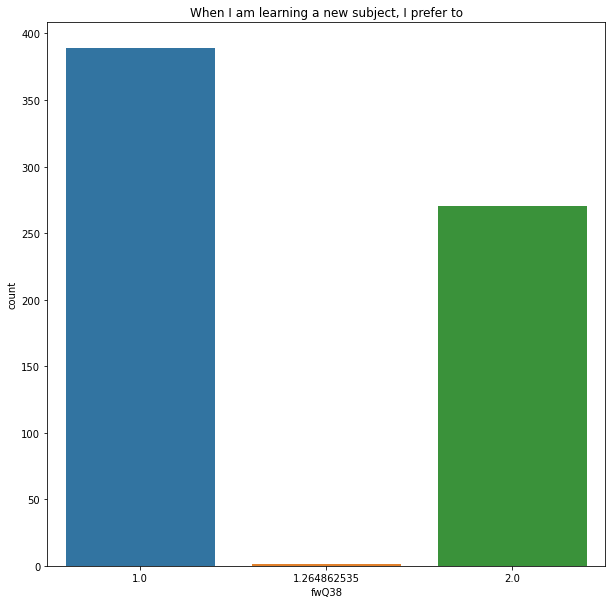

fwQ39


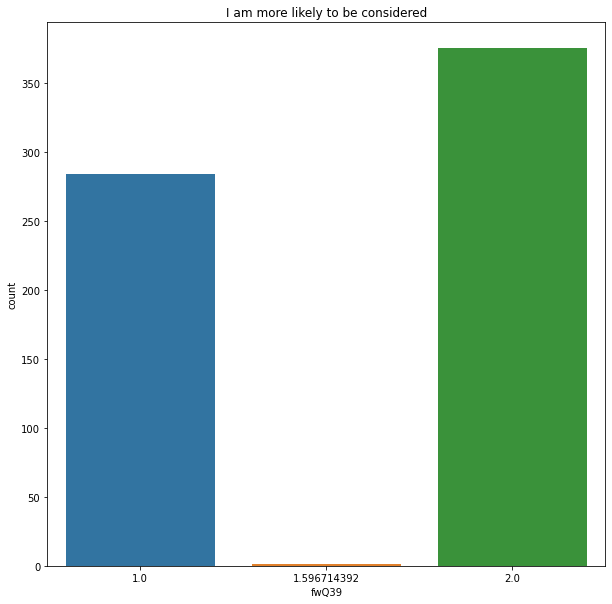

fwQ40


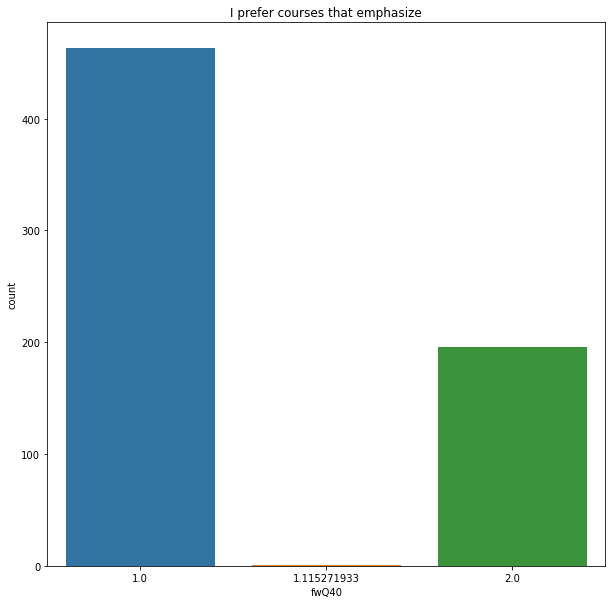

fwQ41


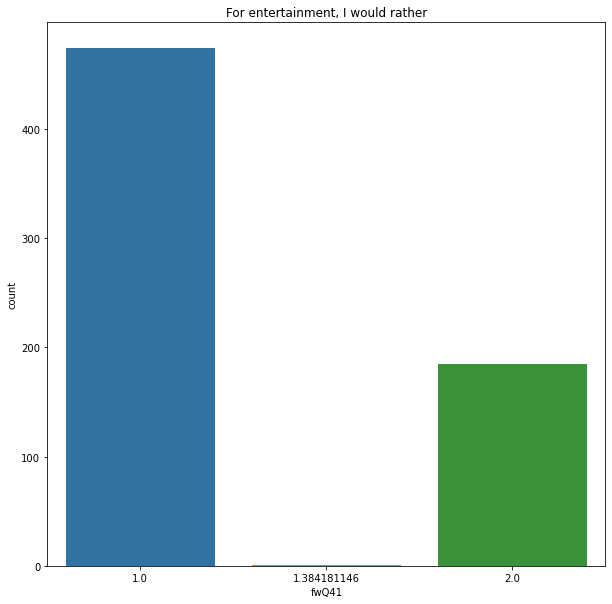

fwQ42


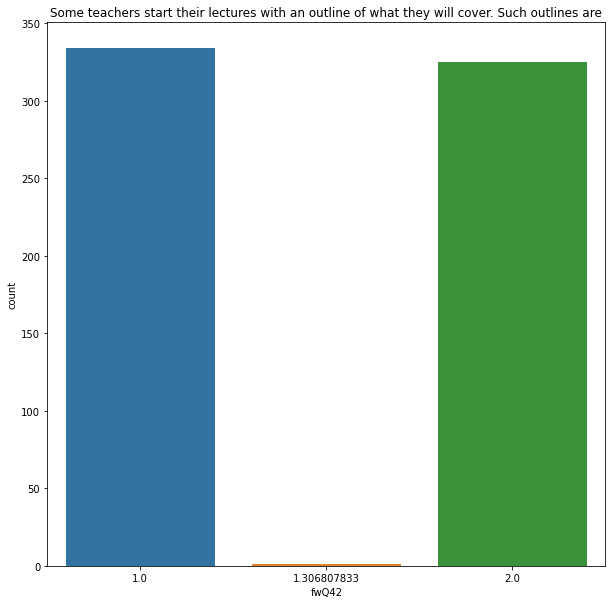

fwQ43


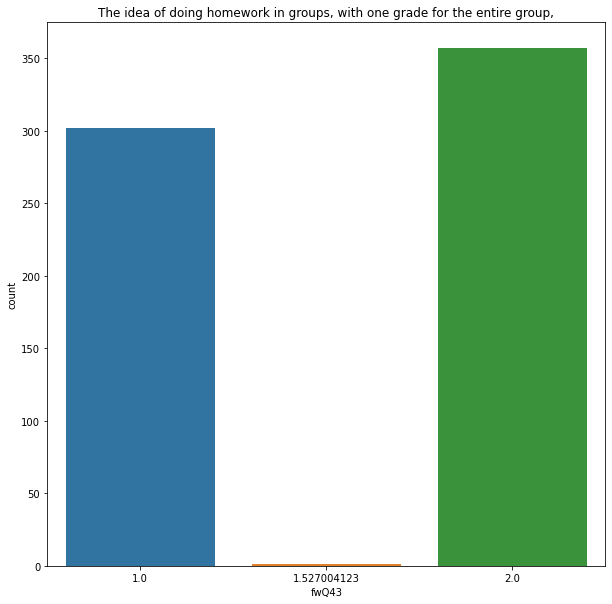

fwQ44


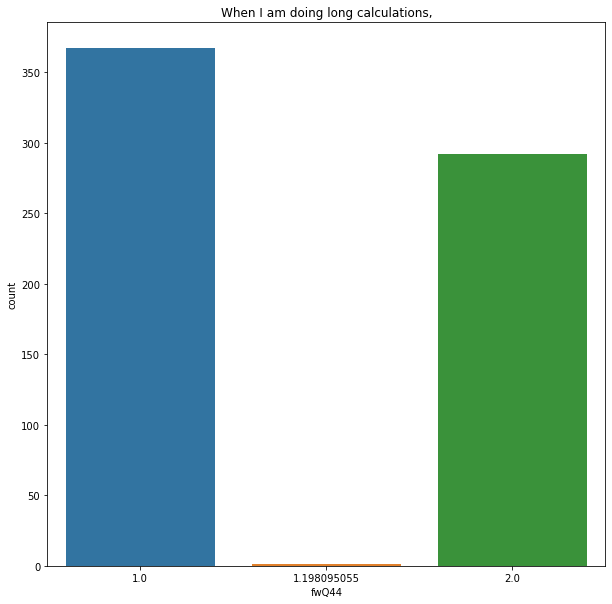

fwQ45


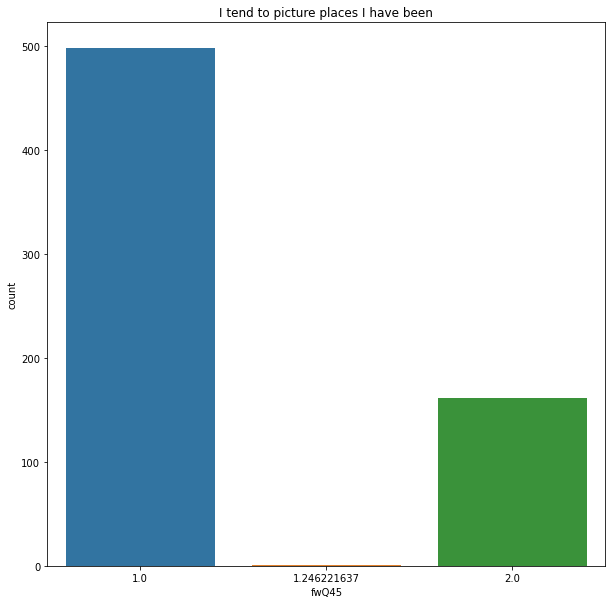

fwQ46


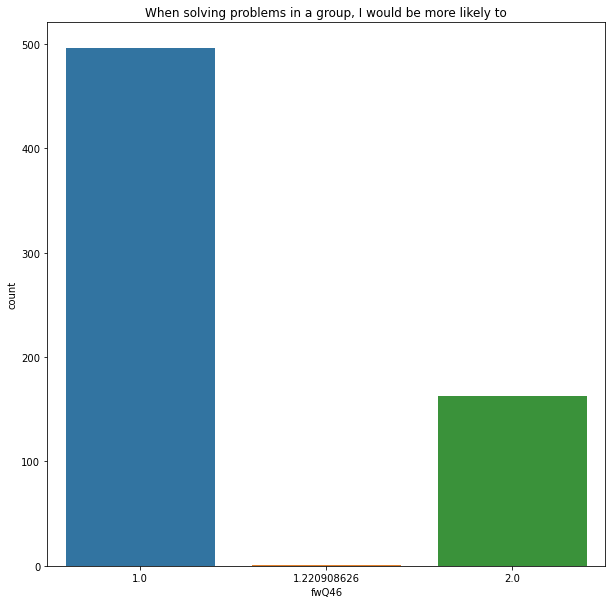

poe1Q1


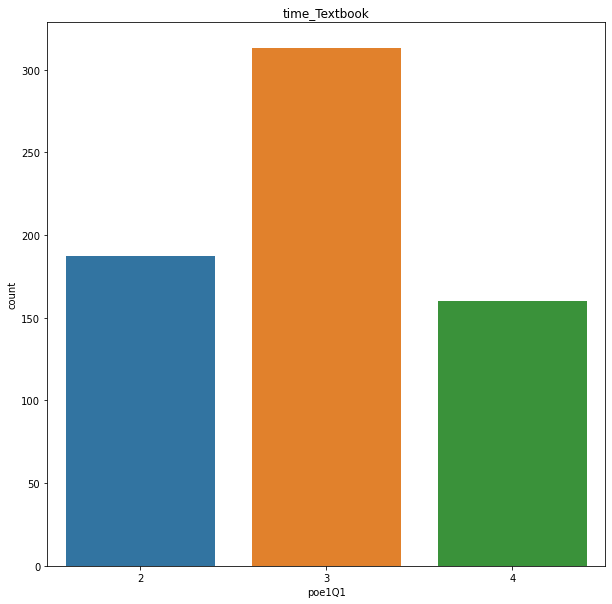

poe1Q2


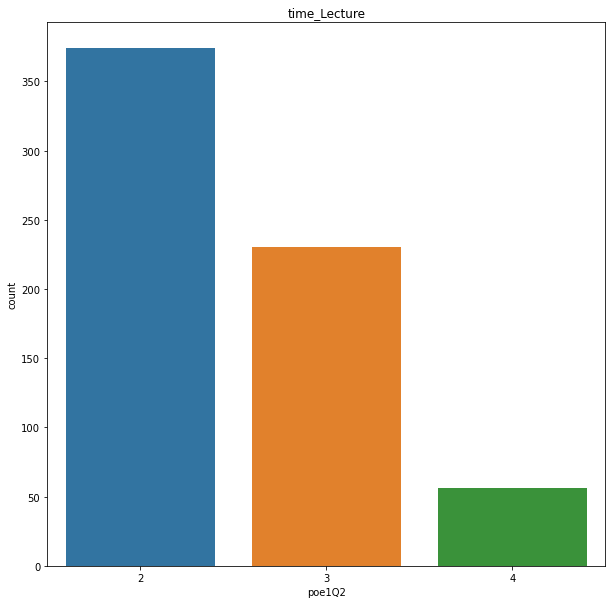

poe1Q3


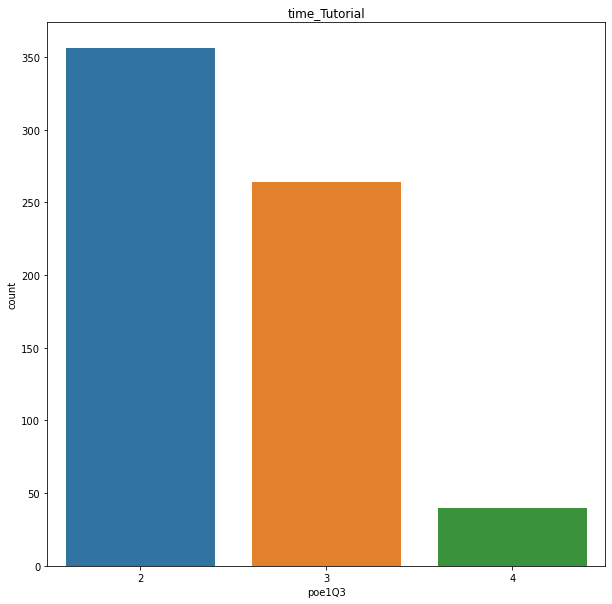

poe1Q4


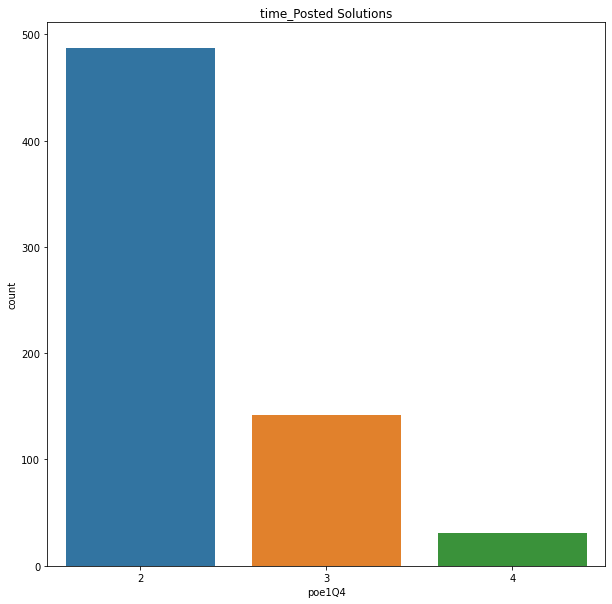

poe1Q5


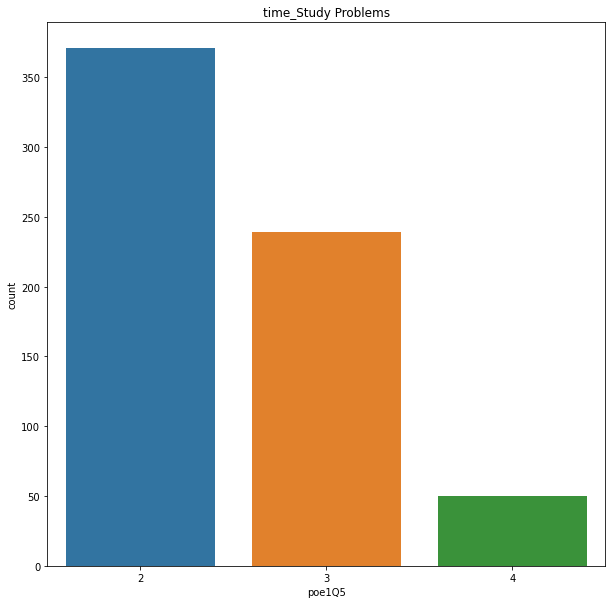

poe1Q6


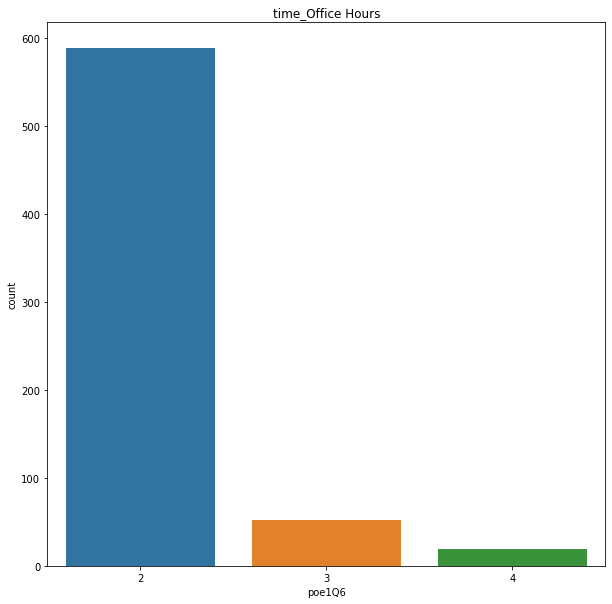

poe1Q7


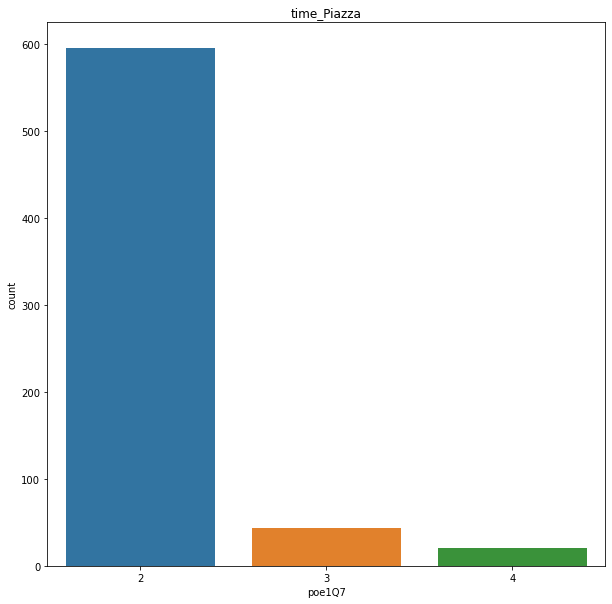

poe1Q8


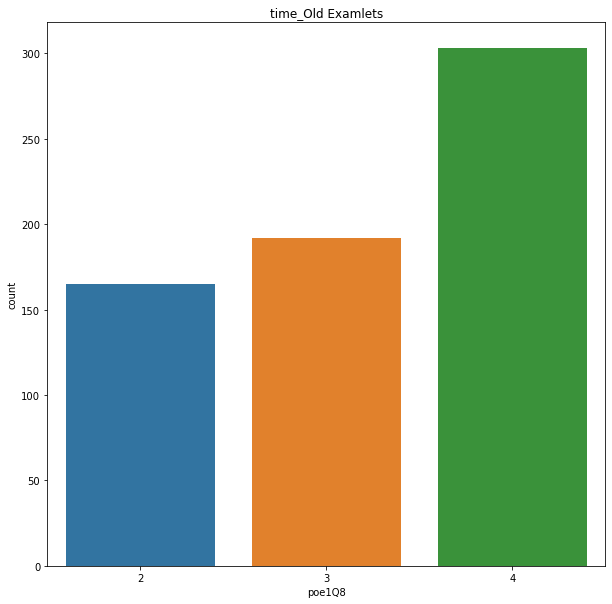

poe1Q9


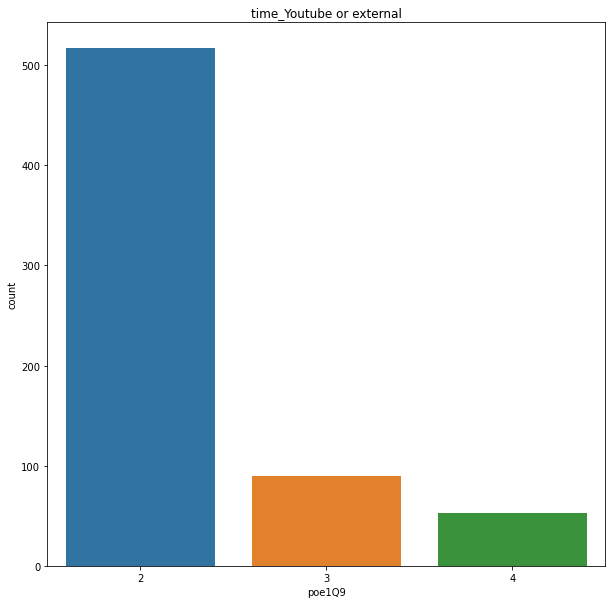

poe1Q10


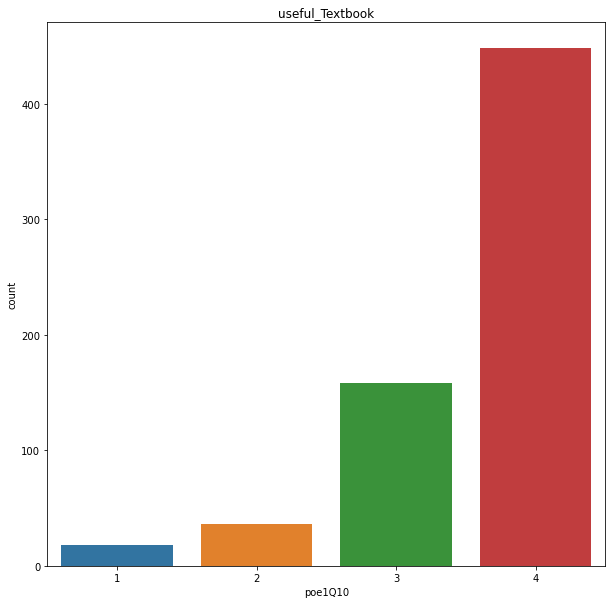

poe1Q11


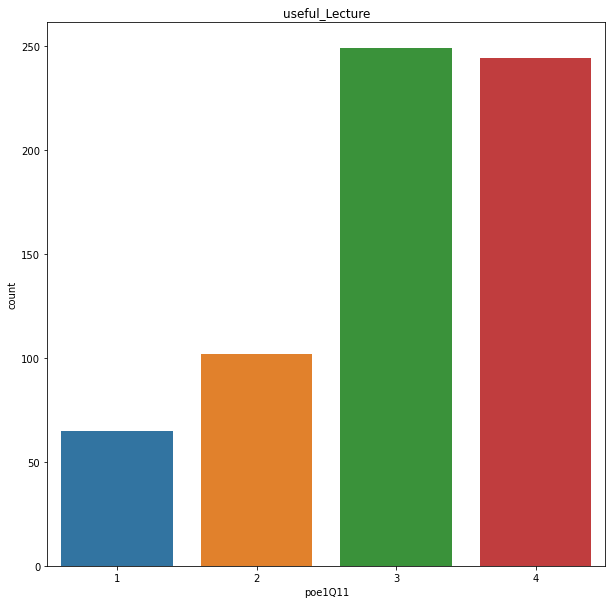

poe1Q12


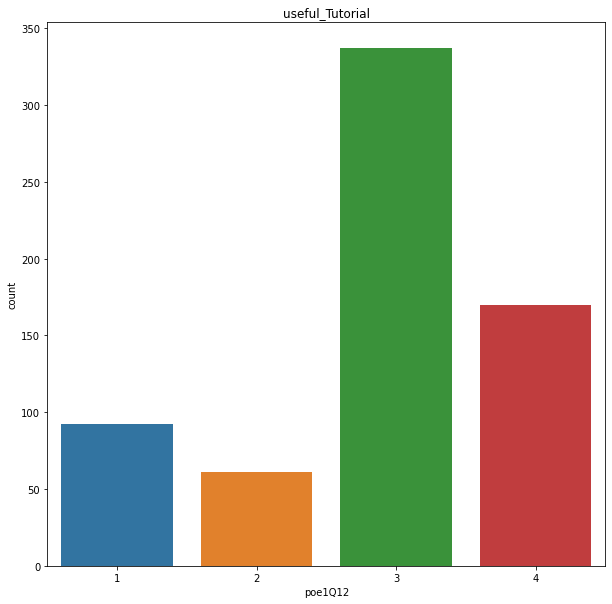

poe1Q13


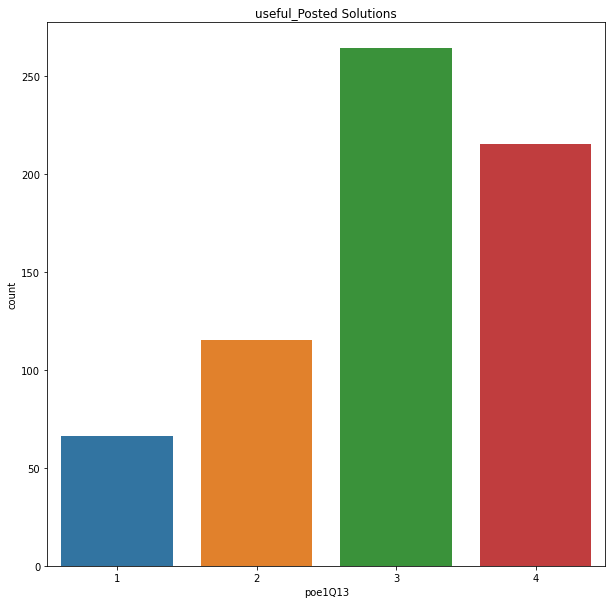

poe1Q14


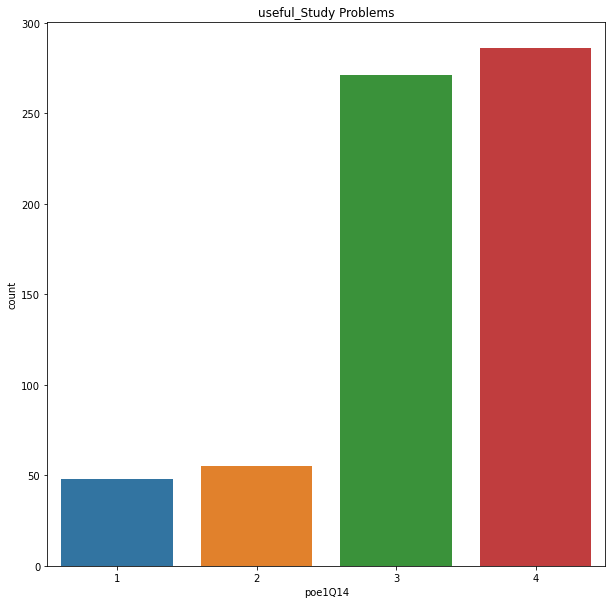

poe1Q15


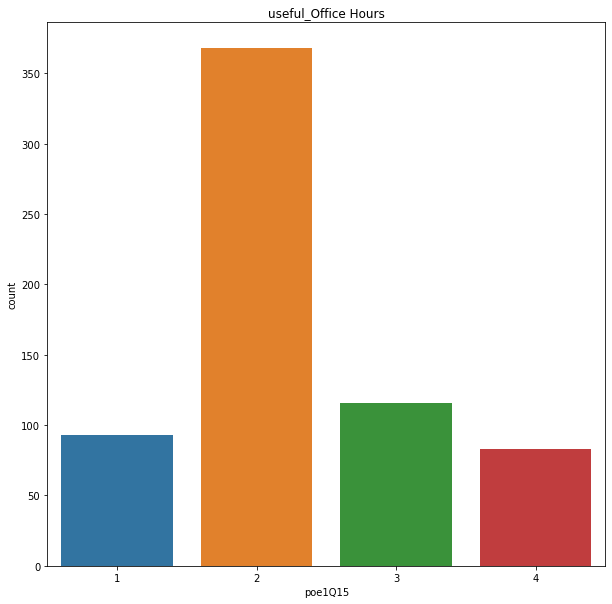

poe1Q16


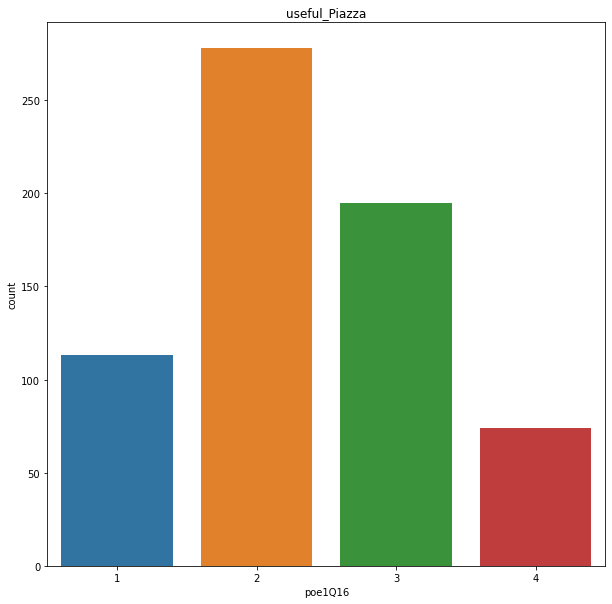

poe1Q17


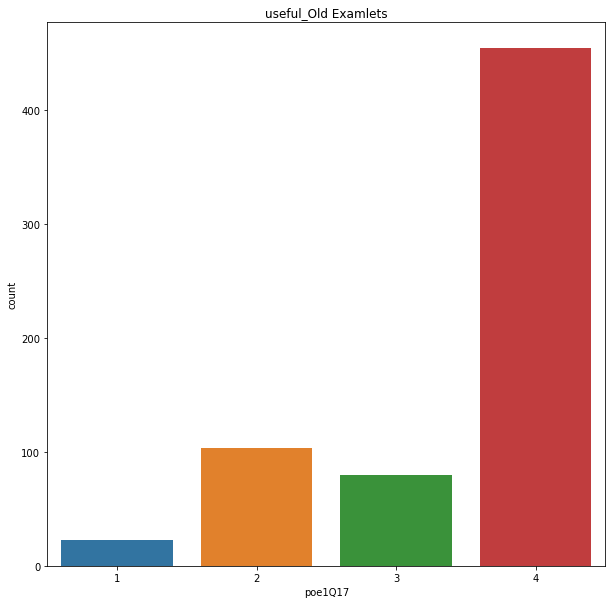

poe1Q18


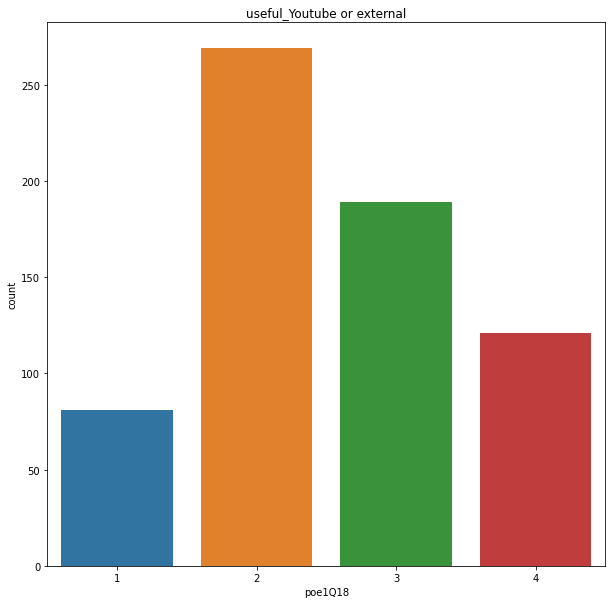

poe2Q1


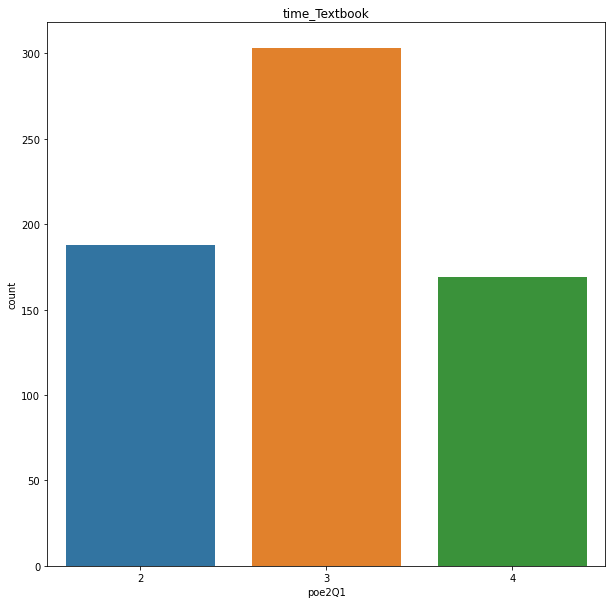

poe2Q2


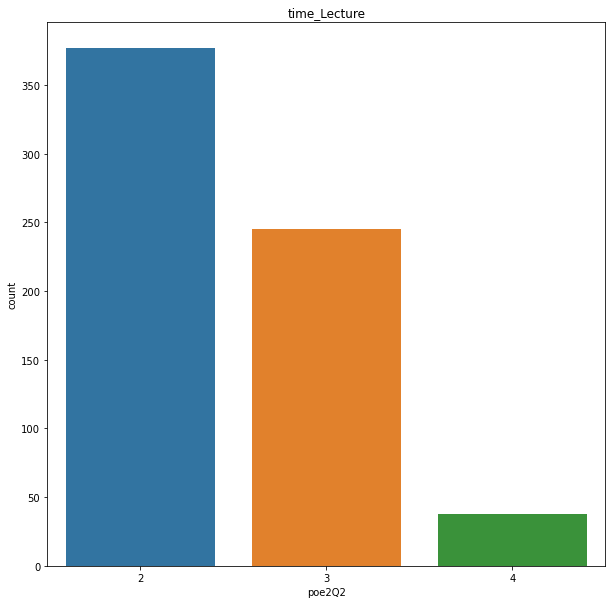

poe2Q3


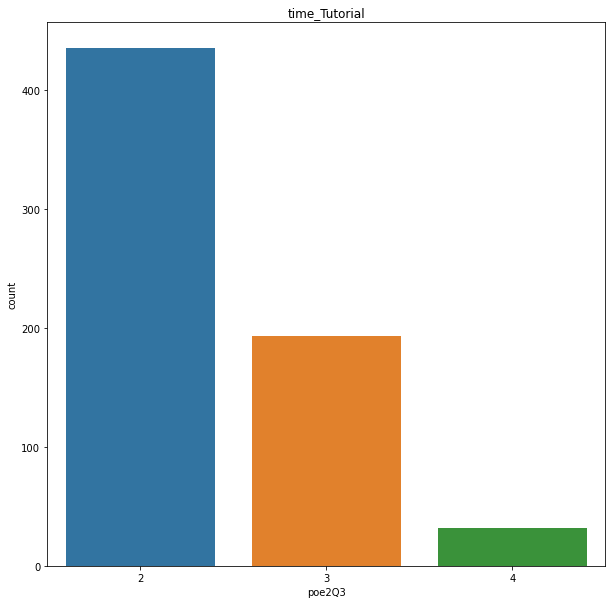

poe2Q4


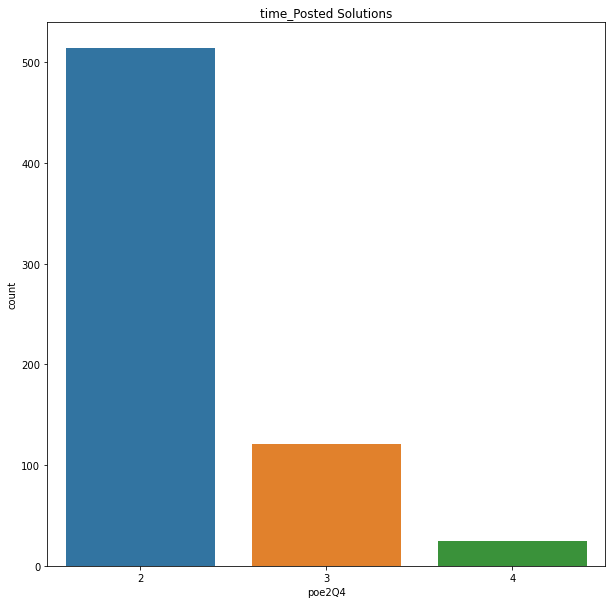

poe2Q5


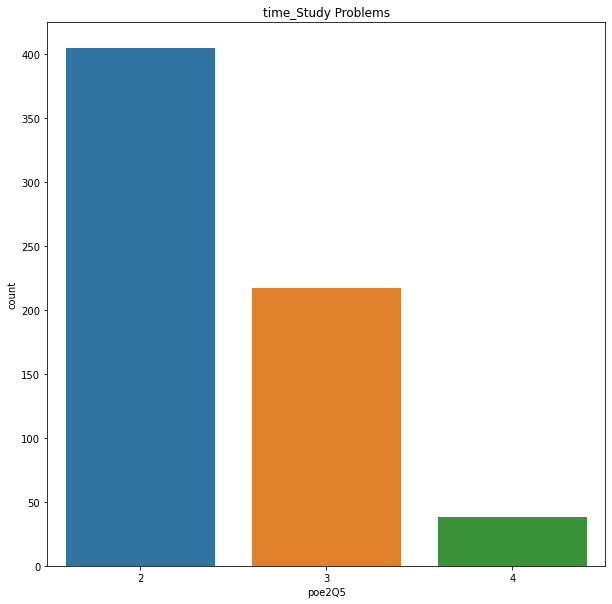

poe2Q6


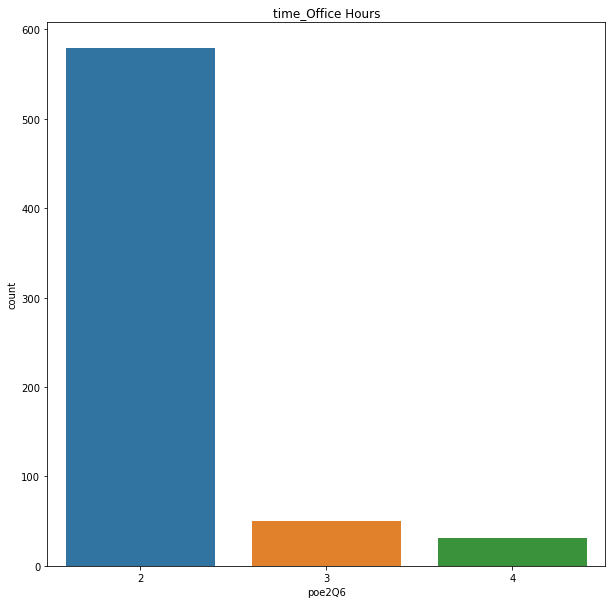

poe2Q7


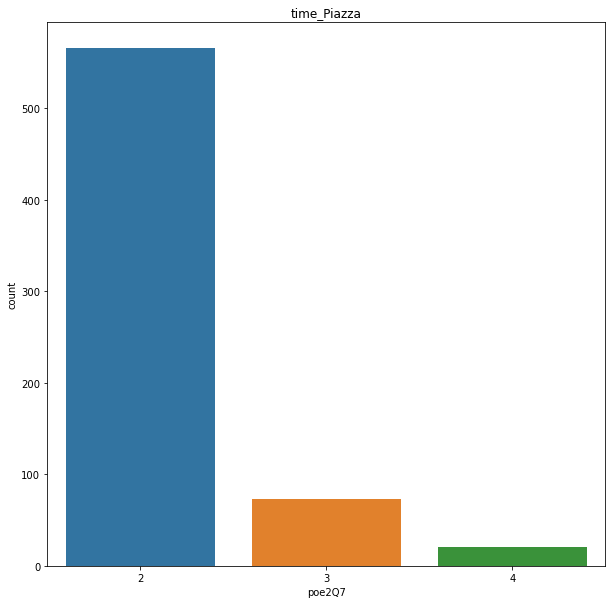

poe2Q8


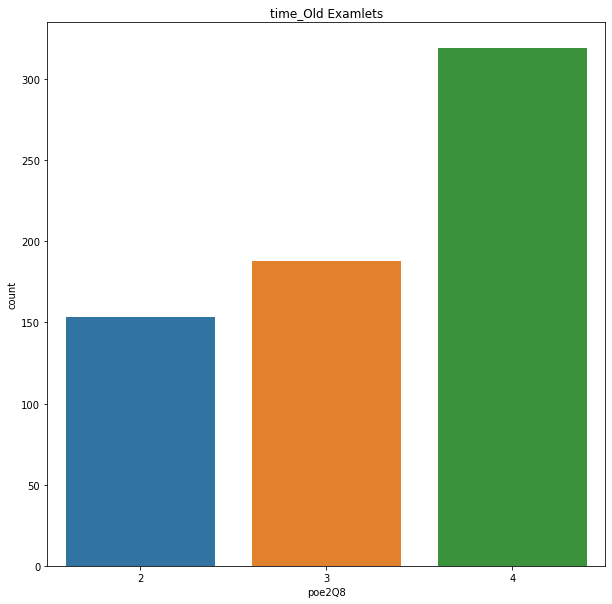

poe2Q9


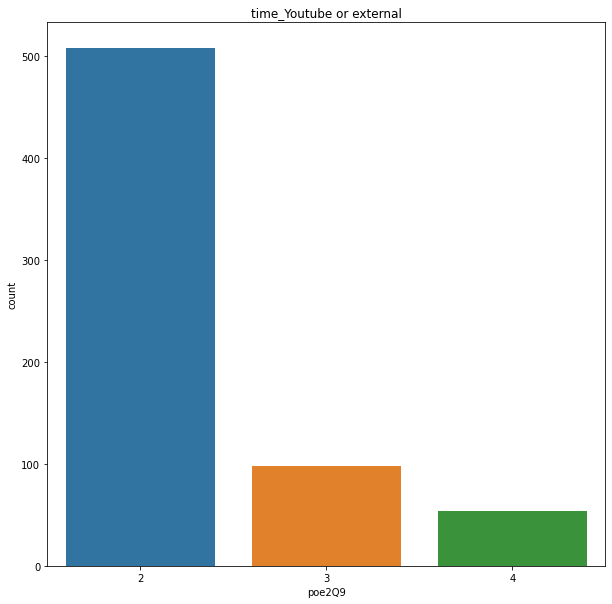

poe2Q10


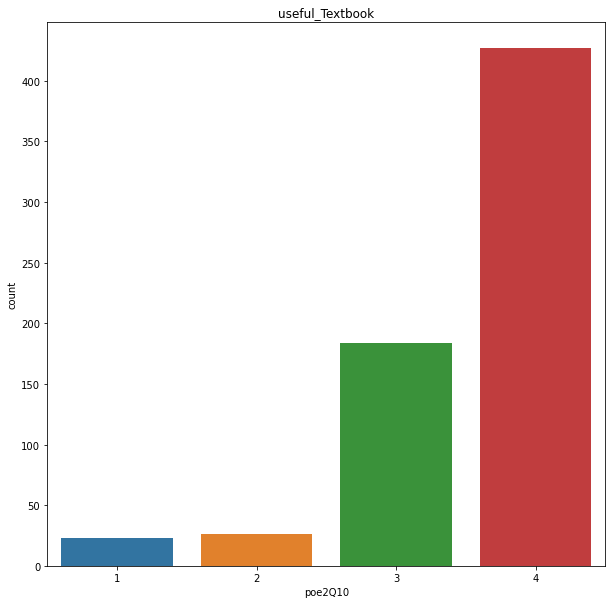

poe2Q11


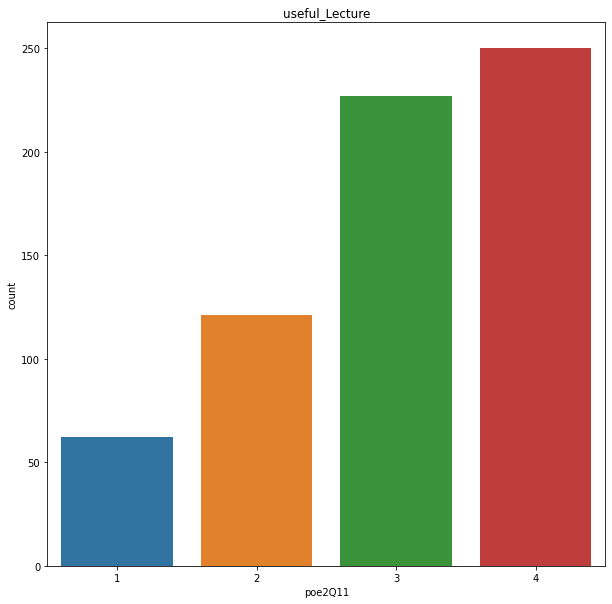

poe2Q12


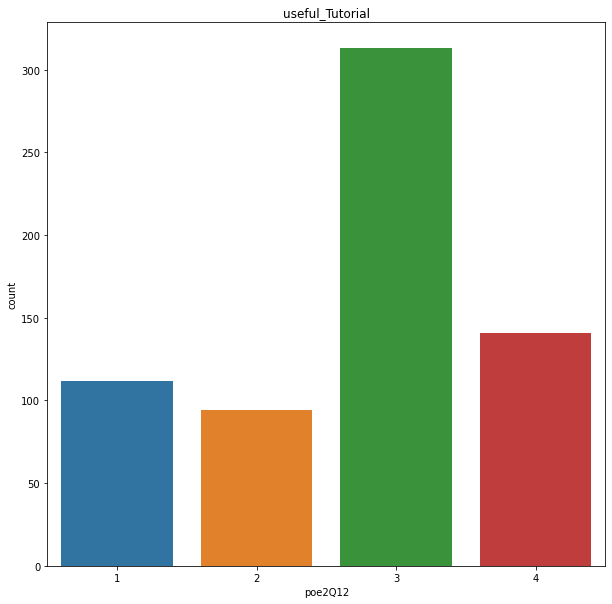

poe2Q13


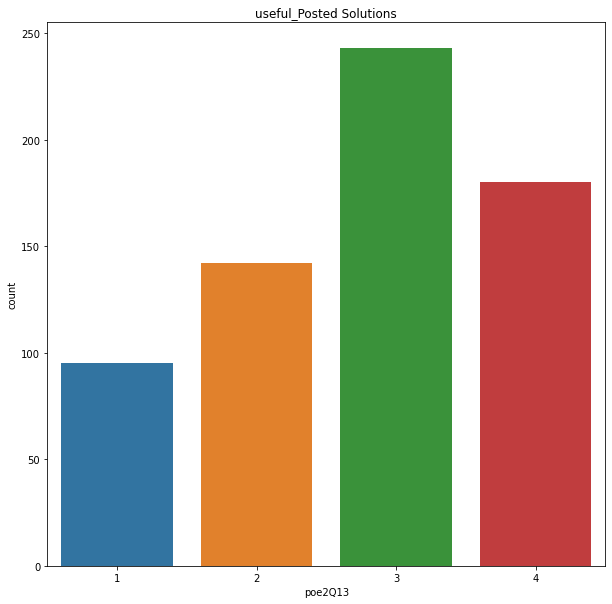

poe2Q14


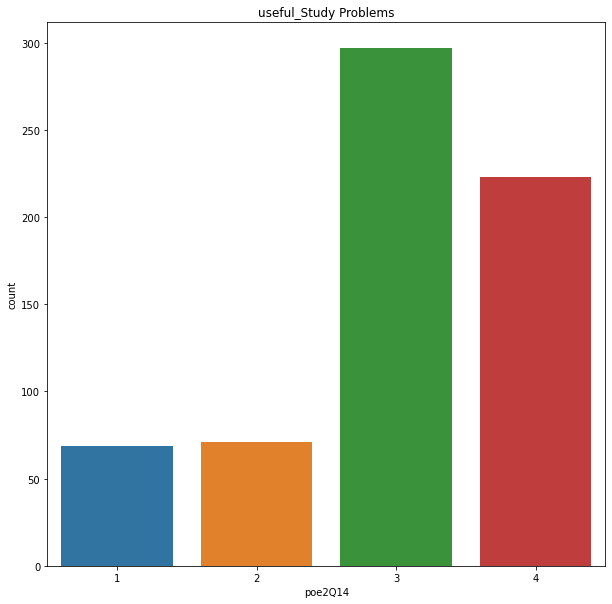

poe2Q15


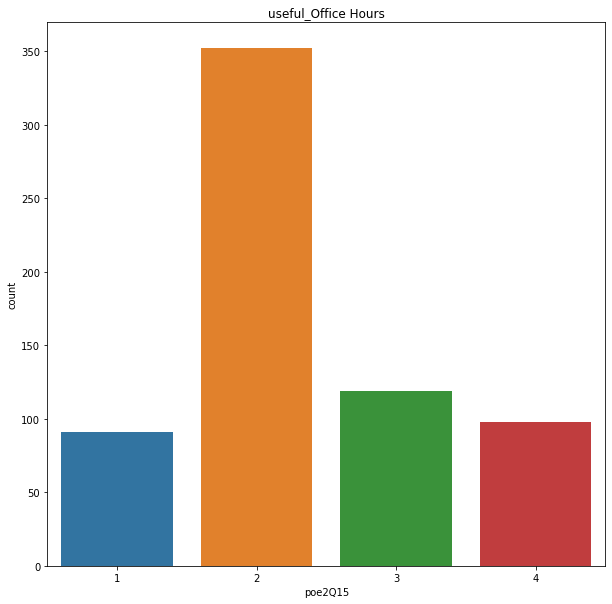

poe2Q16


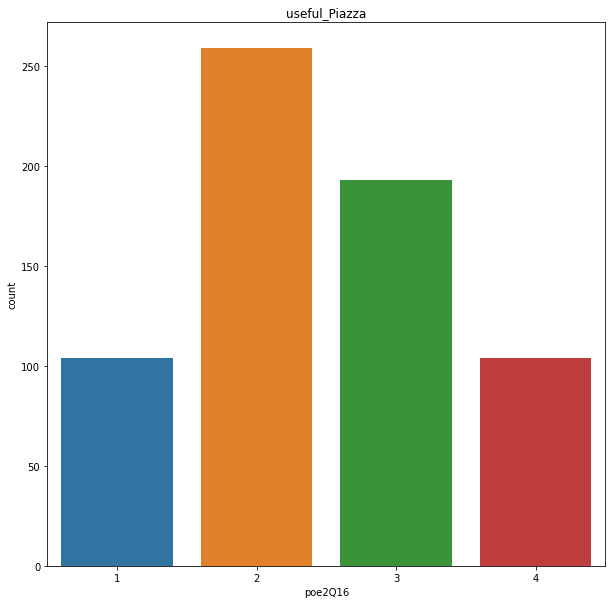

poe2Q17


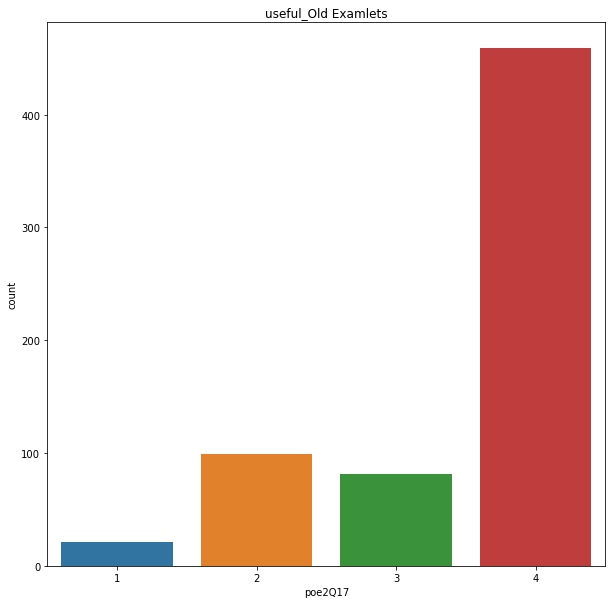

poe2Q18


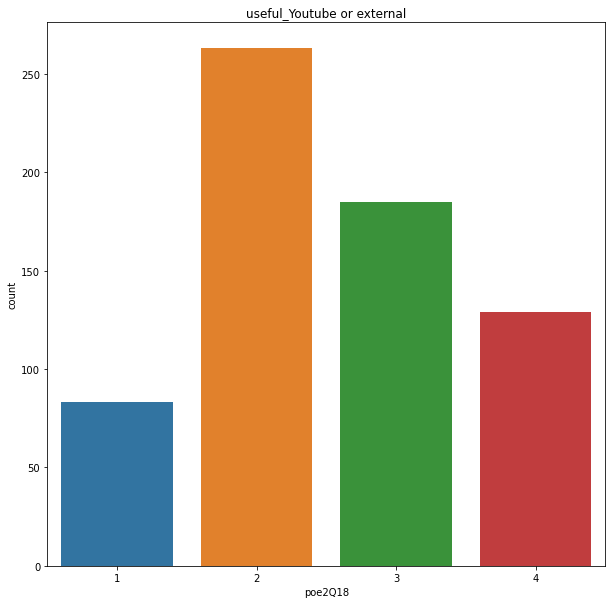

In [25]:
import seaborn as sns

# Convert all columns to object data type
qns_viz = qns.astype('object')
# sns.countplot(x='fwQ1_1', data=qns_viz)
# plt.show()
# plt.rcParams['figure.figsize'] = (10.0,10.0)
# Create countplot for each column
for col in qns_viz.columns:
    print(col)
    title=mapdf[mapdf['ColumnName']==col]['ColumnDescription'].iloc[0]
    sns.countplot(x=col, data=qns_viz)
    plt.title(title)
    plt.show()

In [11]:
print(list( qns_viz.columns))

['fwQ1_1', 'fwQ1_2', 'fwQ1_3', 'fwQ1_4', 'fwQ1_5', 'fwQ1_6', 'fwQ1_7', 'fwQ1_8', 'fwQ1_9', 'fwQ1_10', 'fwQ1_11', 'fwQ1_12', 'fwQ1_13', 'fwQ1_14', 'fwQ1_15', 'fwQ1_16', 'fwQ2_1', 'fwQ2_2', 'fwQ2_3', 'fwQ2_4', 'fwQ2_5', 'fwQ2_6', 'fwQ3', 'fwQ4', 'fwQ5', 'fwQ6', 'fwQ7', 'fwQ8', 'fwQ9', 'fwQ10', 'fwQ11', 'fwQ12', 'fwQ13', 'fwQ14', 'fwQ15', 'fwQ16', 'fwQ17', 'fwQ18', 'fwQ19', 'fwQ20', 'fwQ21', 'fwQ22', 'fwQ23', 'fwQ24', 'fwQ25', 'fwQ26', 'fwQ27', 'fwQ28', 'fwQ29', 'fwQ30', 'fwQ31', 'fwQ32', 'fwQ33', 'fwQ34', 'fwQ35', 'fwQ36', 'fwQ37', 'fwQ38', 'fwQ39', 'fwQ40', 'fwQ41', 'fwQ42', 'fwQ43', 'fwQ44', 'fwQ45', 'fwQ46', 'poe1Q1', 'poe1Q2', 'poe1Q3', 'poe1Q4', 'poe1Q5', 'poe1Q6', 'poe1Q7', 'poe1Q8', 'poe1Q9', 'poe1Q10', 'poe1Q11', 'poe1Q12', 'poe1Q13', 'poe1Q14', 'poe1Q15', 'poe1Q16', 'poe1Q17', 'poe1Q18', 'poe2Q1', 'poe2Q2', 'poe2Q3', 'poe2Q4', 'poe2Q5', 'poe2Q6', 'poe2Q7', 'poe2Q8', 'poe2Q9', 'poe2Q10', 'poe2Q11', 'poe2Q12', 'poe2Q13', 'poe2Q14', 'poe2Q15', 'poe2Q16', 'poe2Q17', 'poe2Q18']


In [29]:
v=df.isnull().sum()
v[v!=0]


fwdate_diff                           658
poe1Staff Illinois Department Name    659
poe2Staff Illinois Department Name    657
finalraw grade                          1
demEDW_PERS_ID                        174
demUIN                                174
demFirstName                          174
demMiddleName                         174
demLastName                           174
demGender                             174
demRace                               174
demStu_Attr                           174
demUnderRepDomestic                   174
demPermAddr1                          179
demPermCity                           179
demPermState                          179
demPermZip                            179
demPermCountry                        179
demDuplicated EDW_PERS_ID             660
demTechGPA                            591
mrtUnnamed: 0                         628
mrtUIN                                628
dtype: int64

In [18]:
X=qns.copy()

dist_mat=gower_matrix(X)
dist_mat

array([[0.        , 0.44624183, 0.4611111 , ..., 0.38284314, 0.42941177,
        0.35669935],
       [0.44624183, 0.        , 0.37892157, ..., 0.37254903, 0.43611112,
        0.39640522],
       [0.4611111 , 0.37892157, 0.        , ..., 0.3485294 , 0.4598039 ,
        0.38251635],
       ...,
       [0.38284314, 0.37254903, 0.3485294 , ..., 0.        , 0.3589869 ,
        0.34607843],
       [0.42941177, 0.43611112, 0.4598039 , ..., 0.3589869 , 0.        ,
        0.45833334],
       [0.35669935, 0.39640522, 0.38251635, ..., 0.34607843, 0.45833334,
        0.        ]], dtype=float32)

C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


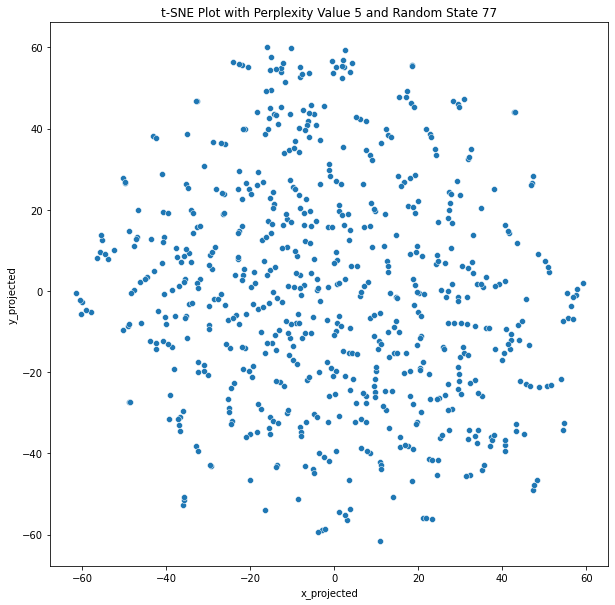

C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


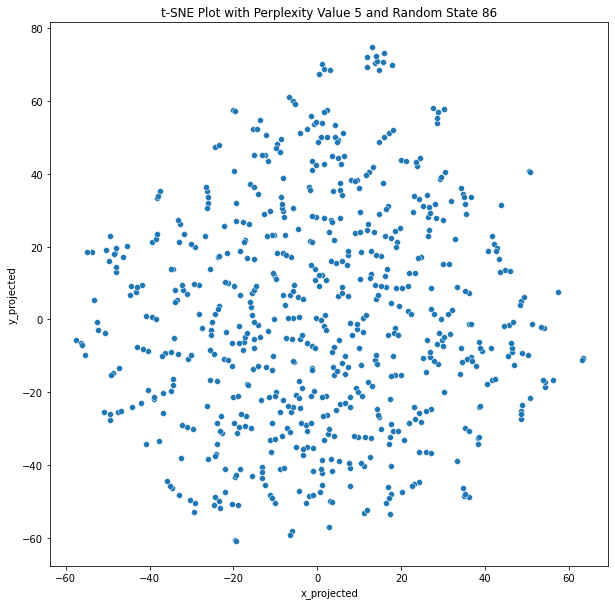

--------------------------------------------


C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


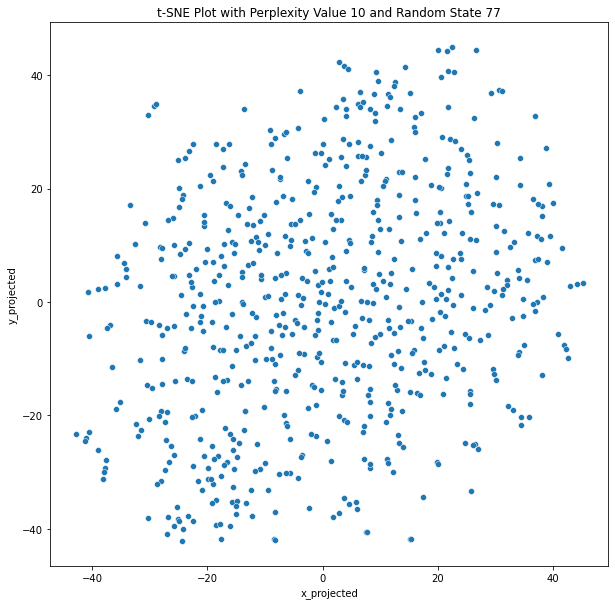

C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


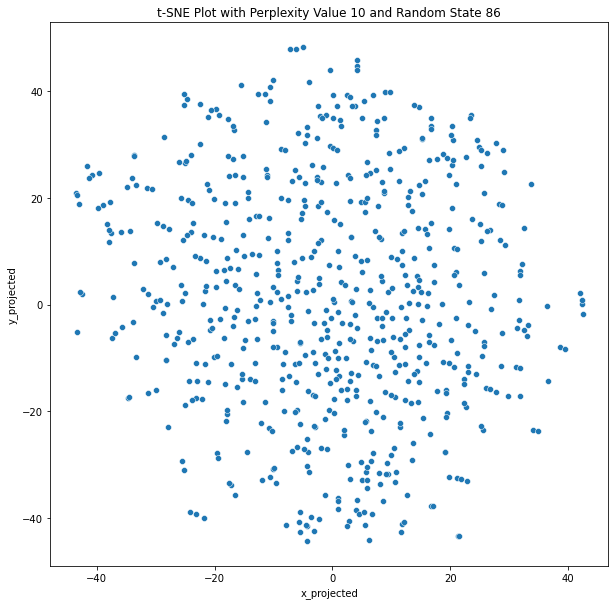

--------------------------------------------


C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


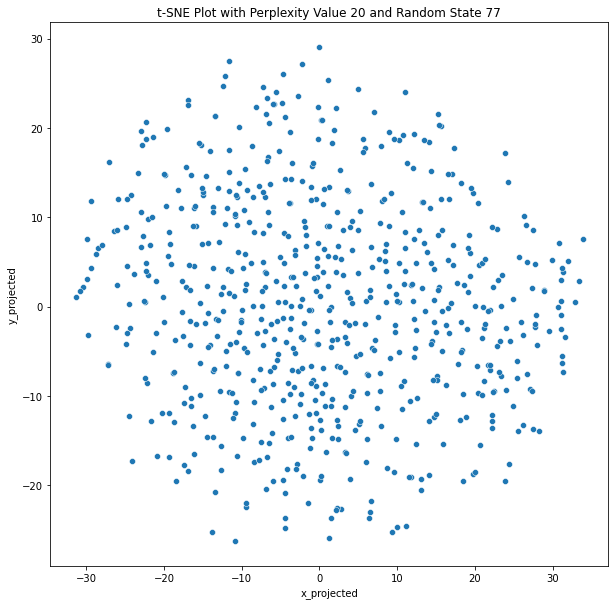

C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


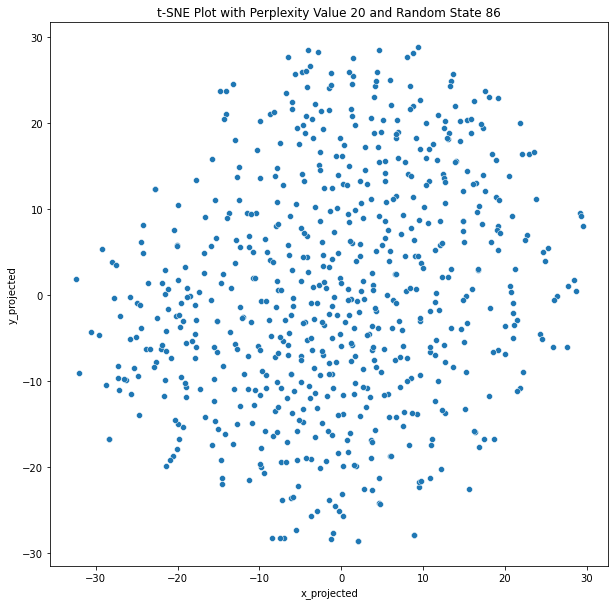

--------------------------------------------


C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


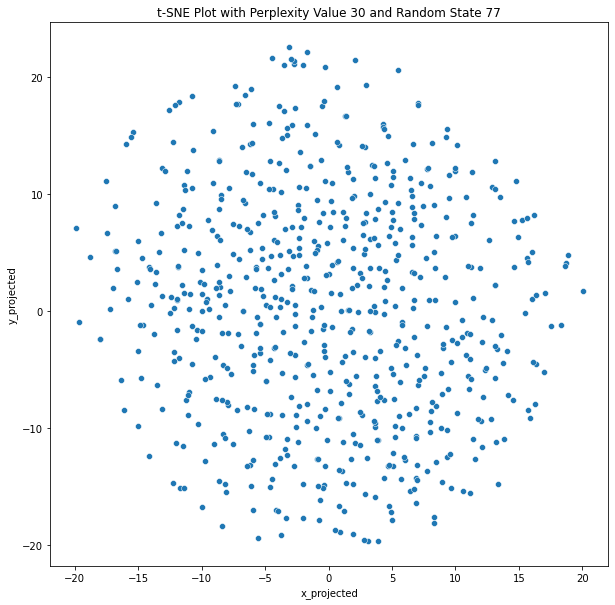

C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


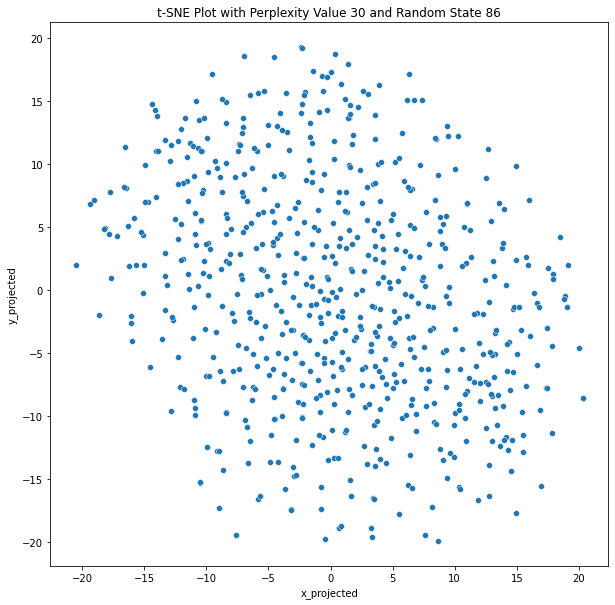

--------------------------------------------


C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


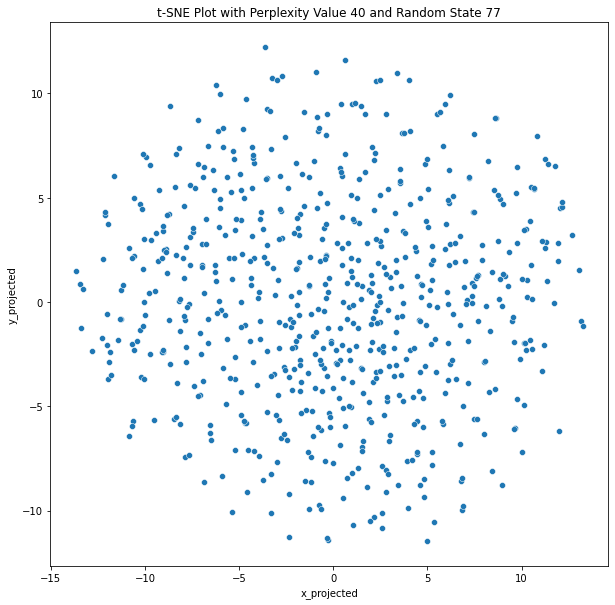

C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


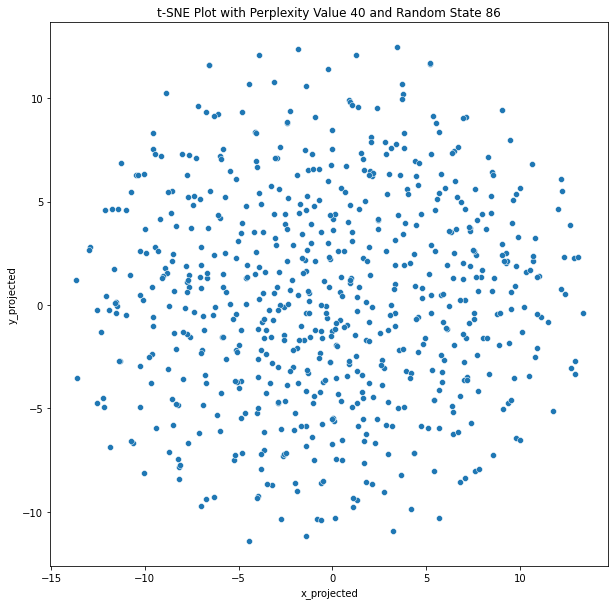

--------------------------------------------


C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


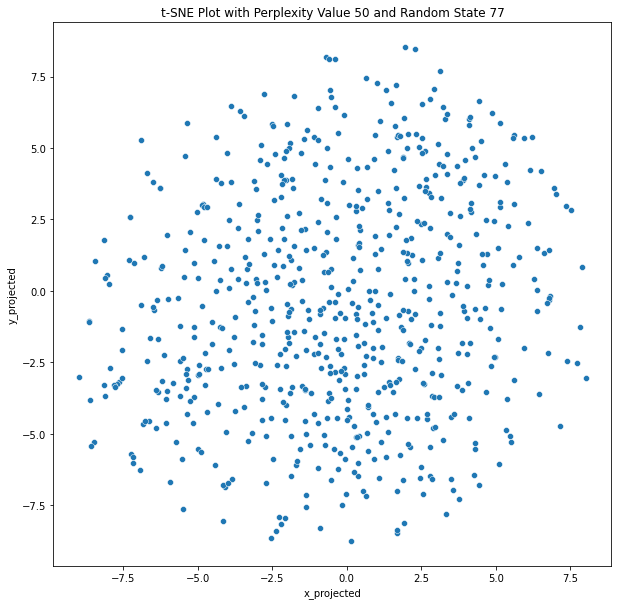

C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


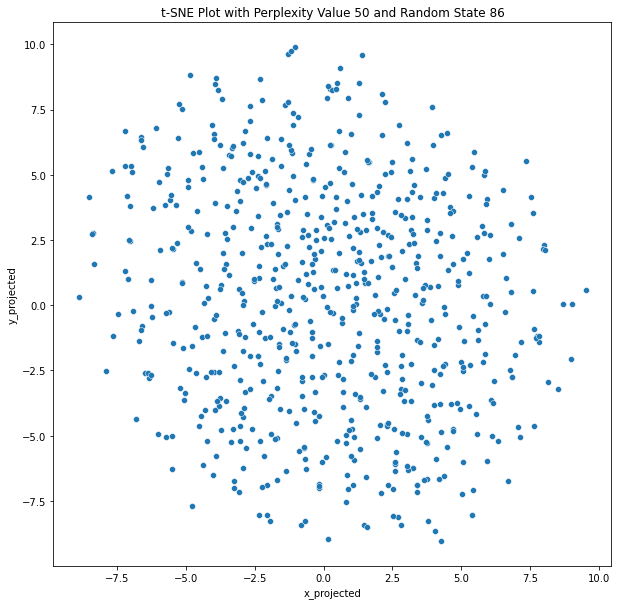

--------------------------------------------


In [20]:
plt.rcParams['figure.figsize'] = (10.0,10.0)
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [77,86]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs, metric='precomputed')
        data_tsne = tsne.fit_transform(dist_mat)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([qns, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

In [50]:
fw_df = qns.filter(like='poe2', axis=1)
fw_df.columns

Index(['poe2Q1', 'poe2Q2', 'poe2Q3', 'poe2Q4', 'poe2Q5', 'poe2Q6', 'poe2Q7',
       'poe2Q8', 'poe2Q9', 'poe2Q10', 'poe2Q11', 'poe2Q12', 'poe2Q13',
       'poe2Q14', 'poe2Q15', 'poe2Q16', 'poe2Q17', 'poe2Q18'],
      dtype='object')

C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


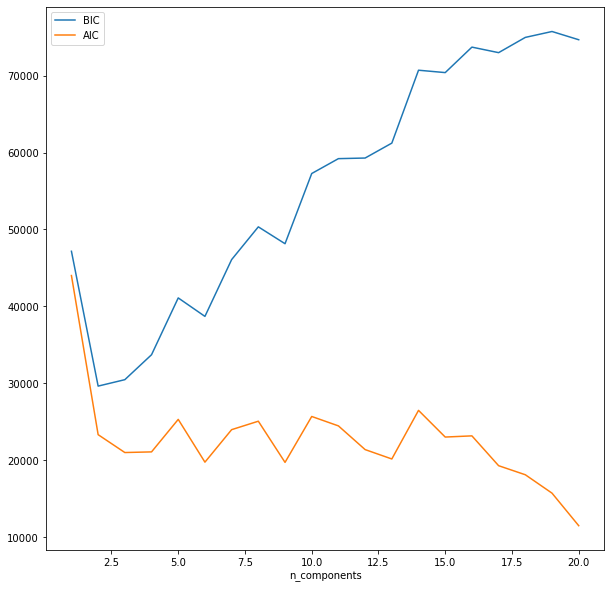

In [41]:
from sklearn import mixture
n_components = np.arange(1, 21)
aic=[]
bic=[]
for n in n_components:
    
    model = mixture.GaussianMixture(n_components=n, covariance_type='full', random_state=0).fit(fw_df)
    aic.append(model.aic(fw_df))
    bic.append(model.bic(fw_df))
plt.plot(n_components, bic, label='BIC')
plt.plot(n_components, aic, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [33]:
qns=qns.astype(int)

In [35]:
qns.to_csv('qns.csv')

In [44]:

min_index = bic.index(min(bic))
print(min_index)

1


C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\debap\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


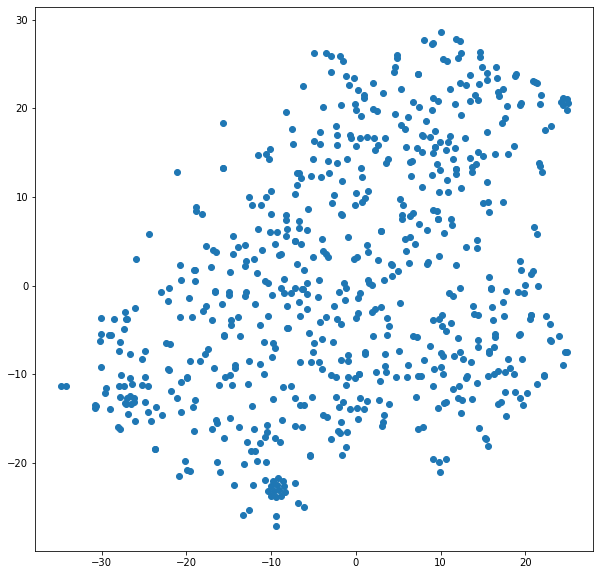

In [51]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create sample data
data = fw_df

# Fit t-SNE model
tsne = TSNE(n_components=2)
transformed_data = tsne.fit_transform(data)

# Plot t-SNE result
x = transformed_data[:, 0]
y = transformed_data[:, 1]
plt.scatter(x, y)
plt.show()

In [52]:
demo=df[df.columns not in qnslist]

Index(['Isfw', 'IsPoe1', 'IsPoe2', 'Ismidterm', 'IsFinal', 'IsMerit', 'netID',
       'fwQ52', 'fwQ1_1', 'fwQ1_2',
       ...
       'demUnderRepDomestic', 'demPermAddr1', 'demPermCity', 'demPermState',
       'demPermZip', 'demPermCountry', 'demDuplicated EDW_PERS_ID',
       'demTechGPA', 'mrtUnnamed: 0', 'mrtUIN'],
      dtype='object', length=186)

In [54]:
demo = df.loc[:, ~df.columns.isin(qn_list)]
demo.to_csv('demo.csv',index=False)